# Artificial Intelligence Nanodegree
## Computer Vision Capstone
## Project: Facial Keypoint Detection

---

Welcome to the final Computer Vision project in the Artificial Intelligence Nanodegree program!  

In this project, you’ll combine your knowledge of computer vision techniques and deep learning to build and end-to-end facial keypoint recognition system! Facial keypoints include points around the eyes, nose, and mouth on any face and are used in many applications, from facial tracking to emotion recognition. 

There are three main parts to this project:

**Part 1** : Investigating OpenCV, pre-processing, and face detection

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

---

**Here's what you need to know to complete the project:*

1. In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. 
    
    a. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 


2. In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. 
    
    a. Each section where you will answer a question is preceded by a **'Question X'** header. 
    
    b. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains **optional** suggestions for enhancing the project beyond the minimum requirements. If you decide to pursue the "(Optional)" sections, you should include the code in this IPython notebook.

Your project submission will be evaluated based on your answers to *each* of the questions and the code implementations you provide.  

### Steps to Complete the Project

Each part of the notebook is further broken down into separate steps.  Feel free to use the links below to navigate the notebook.

In this project you will get to explore a few of the many computer vision algorithms built into the OpenCV library.  This expansive computer vision library is now [almost 20 years old](https://en.wikipedia.org/wiki/OpenCV#History) and still growing! 

The project itself is broken down into three large parts, then even further into separate steps.  Make sure to read through each step, and complete any sections that begin with **'(IMPLEMENTATION)'** in the header; these implementation sections may contain multiple TODOs that will be marked in code.  For convenience, we provide links to each of these steps below.

**Part 1** : Investigating OpenCV, pre-processing, and face detection

* [Step 0](#step0): Detect Faces Using a Haar Cascade Classifier
* [Step 1](#step1): Add Eye Detection
* [Step 2](#step2): De-noise an Image for Better Face Detection
* [Step 3](#step3): Blur an Image and Perform Edge Detection
* [Step 4](#step4): Automatically Hide the Identity of an Individual

**Part 2** : Training a Convolutional Neural Network (CNN) to detect facial keypoints

* [Step 5](#step5): Create a CNN to Recognize Facial Keypoints
* [Step 6](#step6): Compile and Train the Model
* [Step 7](#step7): Visualize the Loss and Answer Questions

**Part 3** : Putting parts 1 and 2 together to identify facial keypoints on any image!

* [Step 8](#step7): Build a Robust Facial Keypoints Detector (Complete the CV Pipeline)



---
<a id='step0'></a>
## Step 0: Detect Faces Using a Haar Cascade Classifier

Have you ever wondered how Facebook automatically tags images with your friends' faces?   Or how high-end cameras automatically find and focus on a certain person's face?  Applications like these depend heavily on the machine learning task known as *face detection* -  which is the task of automatically finding faces in images containing people.  

At its root face detection is a classification problem - that is a problem of distinguishing between distinct classes of things.  With face detection these distinct classes are 1) images of human faces and 2) everything else. 

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `detector_architectures` directory.


### Import Resources 

In the next python cell, we load in the required libraries for this section of the project.

In [ ]:
# Import required libraries for this section

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time 

Next, we load in and display a test image for performing face detection.

*Note*: by default OpenCV assumes the ordering of our image's color channels are Blue, then Green, then Red.  This is slightly out of order with most image types we'll use in these experiments, whose color channels are ordered Red, then Green, then Blue.  In order to switch the Blue and Red channels of our test image around we will use OpenCV's ```cvtColor``` function, which you can read more about by [checking out some of its documentation located here](http://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html).  This is a general utility function that can do other transformations too like converting a color image to grayscale, and transforming a standard color image to HSV color space.

In [ ]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

There are a lot of people - and faces - in this picture.  13 faces to be exact!  In the next code cell, we demonstrate how to use a Haar Cascade classifier to detect all the faces in this test image.

This face detector uses information about patterns of intensity in an image to reliably detect faces under varying light conditions. So, to use this face detector, we'll first convert the image from color to grayscale. 

Then, we load in the fully trained architecture of the face detector -- found in the file *haarcascade_frontalface_default.xml* - and use it on our image to find faces! 

To learn more about the parameters of the detector see [this post](https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters).

In [ ]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

---
<a id='step1'></a>

## Step 1: Add Eye Detections

There are other pre-trained detectors available that use a Haar Cascade Classifier - including full human body detectors, license plate detectors, and more.  [A full list of the pre-trained architectures can be found here](https://github.com/opencv/opencv/tree/master/data/haarcascades). 

To test your eye detector, we'll first read in a new test image with just a single face.

In [ ]:
# Load in color image for face detection
image = cv2.imread('images/james.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Notice that even though the image is a black and white image, we have read it in as a color image and so it will still need to be converted to grayscale in order to perform the most accurate face detection.

So, the next steps will be to convert this image to grayscale, then load OpenCV's face detector and run it with parameters that detect this face accurately.

In [ ]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

### (IMPLEMENTATION) Add an eye detector to the current face detection setup.  

A Haar-cascade eye detector can be included in the same way that the face detector was and, in this first task, it will be your job to do just this.

To set up an eye detector, use the stored parameters of the eye cascade detector, called ```haarcascade_eye.xml```, located in the `detector_architectures` subdirectory.  In the next code cell, create your eye detector and store its detections.

**A few notes before you get started**: 

First, make sure to give your loaded eye detector the variable name

``eye_cascade``


and give the list of eye regions you detect the variable name 

``eyes``

Second, since we've already run the face detector over this image, you should only search for eyes *within the rectangular face regions detected in ``faces``*.  This will minimize false detections.

Lastly, once you've run your eye detector over the facial detection region, you should display the RGB image with both the face detection boxes (in red) and your eye detections (in green) to verify that everything works as expected.

In [ ]:
# Make a copy of the original image to plot rectangle detections
image_with_detections = np.copy(image)   

# Loop over the detections and draw their corresponding face detection boxes
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(255,0,0), 3)  
    
# Do not change the code above this comment!

    
## TODO: Add eye detection, using haarcascade_eye.xml, to the current face detector algorithm
## TODO: Loop over the eye detections and draw their corresponding boxes in green on image_with_detections
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

for (x,y,w,h) in faces:
    image_face_rect = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(image_face_rect)
    
    for (x_e,y_e,w_e,h_e) in eyes:
        # Add a green bounding box to the detections image
        cv2.rectangle(image_with_detections, (x + x_e, y + y_e), (x + x_e + w_e, y + y_e + h_e), (0,255,0), 3)
    

# Plot the image with both faces and eyes detected
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections)

## (Optional) Add face and eye detection to your laptop camera

It's time to kick it up a notch, and add face and eye detection to your laptop's camera!  Afterwards, you'll be able to show off your creation like in the gif shown below - made with a completed version of the code!  

<img src="images/laptop_face_detector_example.gif" width=400 height=300/>

Notice that not all of the detections here are perfect - and your result need not be perfect either.   You should spend a small amount of time tuning the parameters of your detectors to get reasonable results, but don't hold out for perfection.  If we wanted perfection we'd need to spend a ton of time tuning the parameters of each detector, cleaning up the input image frames, etc. You can think of this as more of a rapid prototype. 

The next cell contains code for a wrapper function called ``laptop_camera_face_eye_detector`` that, when called, will activate your laptop's camera.  You will place the relevant face and eye detection code in this wrapper function to implement face/eye detection and mark those detections on each image frame that your camera captures.

Before adding anything to the function, you can run it to get an idea of how it works - a small window should pop up showing you the live feed from your camera; you can press any key to close this window.

**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [ ]:
### Add face and eye detection to this laptop camera function 
# Make sure to draw out all faces/eyes found in each frame on the shown video feed

import cv2
import time 

# wrapper function for face/eye detection with your laptop camera
def laptop_camera_go():
    # Extract the pre-trained face and eye detectors from xml files
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 10.0, (640,480))

    # Keep the video stream open
    while rval:
        
        # Convert the RGB  image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # Detect the faces in image
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        # Make a copy of the orginal image to draw face detections on
        image_with_detections = np.copy(frame)

        # Get the bounding box for each detected face
        for (x,y,w,h) in faces:
            image_face_rect = gray[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(image_face_rect, 1.3, 5)            
            
            for (x_e,y_e,w_e,h_e) in eyes:
                # Add a green bounding box to the detections image
                cv2.rectangle(image_with_detections, (x + x_e, y + y_e), (x + x_e + w_e, y + y_e + h_e), (0,255,0), 3)            
        
            # Add a red bounding box to the detections image
            cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)

        # write the frame
        out.write(image_with_detections)
        
        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("face detection activated", image_with_detections)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            vc.release()
            out.release()

            # Destroy windows 
            cv2.destroyAllWindows()
          
            # Make sure window closes on OSx
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    

In [ ]:
# Call the laptop camera face/eye detector function above
laptop_camera_go()

---
<a id='step2'></a>

## Step 2: De-noise an Image for Better Face Detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection.  While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice!

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in.  This sort of cleaning - referred to as *pre-processing* - can include a number of cleaning phases like blurring, de-noising, color transformations, etc., and many of these tasks can be accomplished using OpenCV.

In this short subsection we explore OpenCV's noise-removal functionality to see how we can clean up a noisy image, which we then feed into our trained face detector.

### Create a noisy image to work with

In the next cell, we create an artificial noisy version of the previous multi-face image.  This is a little exaggerated - we don't typically get images that are this noisy - but [image noise](https://digital-photography-school.com/how-to-avoid-and-reduce-noise-in-your-images/), or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

In [ ]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 45
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

In the context of face detection, the problem with an image like this is that  - due to noise - we may miss some faces or get false detections.  

In the next cell we apply the same trained OpenCV detector with the same settings as before, to see what sort of detections we get.

In [ ]:
# Convert the RGB  image to grayscale
gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_noise, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_with_noise)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

With this added noise we now miss one of the faces!

### (IMPLEMENTATION) De-noise this image for better face detection

Time to get your hands dirty: using OpenCV's built in color image de-noising functionality called ```fastNlMeansDenoisingColored``` - de-noise this image enough so that all the faces in the image are properly detected.  Once you have cleaned the image in the next cell, use the cell that follows to run our trained face detector over the cleaned image to check out its detections.

You can find its [official documentation here]([documentation for denoising](http://docs.opencv.org/trunk/d1/d79/group__photo__denoise.html#ga21abc1c8b0e15f78cd3eff672cb6c476) and [a useful example here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_photo/py_non_local_means/py_non_local_means.html).


**Note:** you can keep all parameters *except* `photo_render` fixed as shown in the second link above.  Play around with the value of this parameter - see how it affects the resulting cleaned image.

In [ ]:
## TODO: Use OpenCV's built in color image de-noising function to clean up our noisy image!


denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise, None, 20, 20, 7, 21)

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Denoised Image')
ax1.imshow(denoised_image)

In [ ]:
## TODO: Run the face detector on the de-noised image to improve your detections and display the result
# Convert the RGB  image to grayscale
gray_denoised = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_denoised, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(denoised_image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Denoised Image with Face Detections')
ax1.imshow(image_with_detections)

---
<a id='step3'></a>

## Step 3: Blur an Image and Perform Edge Detection

Now that we have developed a simple pipeline for detecting faces using OpenCV - let's start playing around with a few fun things we can do with all those detected faces!

### Importance of Blur in Edge Detection

Edge detection is a concept that pops up almost everywhere in computer vision applications, as edge-based features (as well as features built on top of edges) are often some of the best features for e.g., object detection and recognition problems.

Edge detection is a dimension reduction technique - by keeping only the edges of an image we get to throw away a lot of non-discriminating information.  And typically the most useful kind of edge-detection is one that preserves only the important, global structures (ignoring local structures that aren't very discriminative).  So removing local structures / retaining global structures is a crucial pre-processing step to performing edge detection in an image, and blurring can do just that.  

Below is an animated gif showing the result of an edge-detected cat [taken from Wikipedia](https://en.wikipedia.org/wiki/Gaussian_blur#Common_uses), where the image is gradually blurred more and more prior to edge detection.  When the animation begins you can't quite make out what it's a picture of, but as the animation evolves and local structures are removed via blurring the cat becomes visible in the edge-detected image.

<img src="images/Edge_Image.gif" width=400 height=300/>

Edge detection is a **convolution** performed on the image itself, and you can read about Canny edge detection on [this OpenCV documentation page](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html).

### Canny edge detection

In the cell below we load in a test image, then apply *Canny edge detection* on it.  The original image is shown on the left panel of the figure, while the edge-detected version of the image is shown on the right.  Notice how the result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector.  When applied in computer vision applications, edge detection should preserve *global* structure; doing away with local structures that don't help describe what objects are in the image.

In [ ]:
# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

Without first blurring the image, and removing small, local structures, a lot of irrelevant edge content gets picked up and amplified by the detector (as shown in the right panel above). 

### (IMPLEMENTATION) Blur the image *then* perform edge detection

In the next cell, you will repeat this experiment - blurring the image first to remove these local structures, so that only the important boudnary details remain in the edge-detected image.

Blur the image by using OpenCV's ```filter2d``` functionality - which is discussed in [this documentation page](http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html) - and use an *averaging kernel* of width equal to 4.

In [ ]:
### TODO: Blur the test imageusing OpenCV's filter2d functionality, 
# Use an averaging kernel, and a kernel width equal to 4
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

kernel = np.ones((4,4), np.float32) / 16
image_blurred = cv2.filter2D(gray, -1, kernel)
    
## TODO: Then perform Canny edge detection and display the output
edges = cv2.Canny(image_blurred,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')


---
<a id='step4'></a>

## Step 4: Automatically Hide the Identity of an Individual

If you film something like a documentary or reality TV, you must get permission from every individual shown on film before you can show their face, otherwise you need to blur it out - by blurring the face a lot (so much so that even the global structures are obscured)!  This is also true for projects like [Google's StreetView maps](https://www.google.com/streetview/) - an enormous collection of mapping images taken from a fleet of Google vehicles.  Because it would be impossible for Google to get the permission of every single person accidentally captured in one of these images they blur out everyone's faces, the detected images must automatically blur the identity of detected people.  Here's a few examples of folks caught in the camera of a Google street view vehicle.

<img src="images/streetview_example_1.jpg" width=400 height=300/>
<img src="images/streetview_example_2.jpg" width=400 height=300/>


### Read in an image to perform identity detection

Let's try this out for ourselves.  Use the face detection pipeline built above and what you know about using the ```filter2D``` to blur and image, and use these in tandem to hide the identity of the person in the following image - loaded in and printed in the next cell. 

In [ ]:
# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

### (IMPLEMENTATION) Use blurring to hide the identity of an individual in an image

The idea here is to 1) automatically detect the face in this image, and then 2) blur it out!  Make sure to adjust the parameters of the *averaging* blur filter to completely obscure this person's identity.

In [ ]:
## TODO: Implement face detection
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

## TODO: Blur the bounding box around each detected face using an averaging filter and display the result
kernel = np.ones((100,100), np.float32) / 10000
image_with_detections[y:y+h, x:x+w] = cv2.filter2D(image_with_detections[y:y+h, x:x+w], -1, kernel)

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

### (Optional) Build identity protection into your laptop camera

In this optional task you can add identity protection to your laptop camera, using the previously completed code where you added face detection to your laptop camera - and the task above.  You should be able to get reasonable results with little parameter tuning - like the one shown in the gif below.

<img src="images/laptop_blurer_example.gif" width=400 height=300/>

As with the previous video task, to make this perfect would require significant effort - so don't strive for perfection here, strive for reasonable quality.  

The next cell contains code a wrapper function called ``laptop_camera_identity_hider`` that - when called  - will activate your laptop's camera.  You need to place the relevant face detection and blurring code developed above in this function in order to blur faces entering your laptop camera's field of view.

Before adding anything to the function you can call it to get a hang of how it works - a small window will pop up showing you the live feed from your camera, you can press any key to close this window.

**Note:** Mac users may find that activating this function kills the kernel of their notebook every once in a while.  If this happens to you, just restart your notebook's kernel, activate cell(s) containing any crucial import statements, and you'll be good to go!

In [ ]:
### Insert face detection and blurring code into the wrapper below to create an identity protector on your laptop!
import cv2
import time 

def laptop_camera_go():
    # Extract the pre-trained face and eye detectors from xml files
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
    
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Keep video stream open
    while rval:
        # Convert the RGB  image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # Detect the faces in image
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)
        
        # Make a copy of the orginal image to draw face detections on
        image_with_detections = np.copy(frame)

        # Get the bounding box for each detected face
        for (x,y,w,h) in faces:
            image_face_rect = gray[y:y+h, x:x+w]

            kernel = np.ones((50,50), np.float32) / 2500
            image_with_detections[y:y+h, x:x+w] = cv2.filter2D(image_with_detections[y:y+h, x:x+w], -1, kernel)
        

        # Plot the image from camera with all the face and eye detections marked
        cv2.imshow("face detection activated", image_with_detections)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # Exit by pressing any key
            vc.release()

            # Destroy windows
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    
        

In [ ]:
# Run laptop identity hider
laptop_camera_go()

---
<a id='step5'></a>

## Step 5: Create a CNN to Recognize Facial Keypoints

OpenCV is often used in practice with other machine learning and deep learning libraries to produce interesting results.  In this stage of the project you will create your own end-to-end pipeline - employing convolutional networks in keras along with OpenCV - to apply a "selfie" filter to streaming video and images.  

You will start by creating and then training a convolutional network that can detect facial keypoints in a small dataset of cropped images of human faces.  We then guide you towards OpenCV to expanding your detection algorithm to more general images.  What are facial keypoints?  Let's take a look at some examples.

<img src="images/keypoints_test_results.png" width=400 height=300/>

Facial keypoints (also called facial landmarks) are the small blue-green dots shown on each of the faces in the image above - there are 15 keypoints marked in each image.  They mark important areas of the face - the eyes, corners of the mouth, the nose, etc.  Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.

Below we illustrate a filter that, using the results of this section, automatically places sunglasses on people in images (using the facial keypoints to place the glasses correctly on each face).  Here, the facial keypoints have been colored lime green for visualization purposes.

<img src="images/obamas_with_shades.png" width=1000 height=1000/>

### Make a facial keypoint detector

But first things first: how can we make a facial keypoint detector?  Well, at a high level, notice that facial keypoint detection is a *regression problem*.  A single face corresponds to a set of 15 facial keypoints (a set of 15 corresponding $(x, y)$ coordinates, i.e., an output point).  Because our input data are images, we can employ a *convolutional neural network* to recognize patterns in our images and learn how to identify these keypoint given sets of labeled data.

In order to train a regressor, we need a training set - a set of facial image / facial keypoint pairs to train on.  For this we will be using [this dataset from Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data). We've already downloaded this data and placed it in the `data` directory. Make sure that you have both the *training* and *test* data files.  The training dataset contains several thousand $96 \times 96$ grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, and recorded in $(x, y)$ coordinates.  This wonderful resource also has a substantial testing set, which we will use in tinkering with our convolutional network.

To load in this data, run the Python cell below - notice we will load in both the training and testing sets.

The `load_data` function is in the included `utils.py` file.

In [1]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))



Using TensorFlow backend.


X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)
# left_eye_center_x -> right_eye_center_x
# left_eye_center_y -> right_eye_center_y
# left_eye_inner_corner_x -> right_eye_inner_corner_x
# left_eye_inner_corner_y -> right_eye_inner_corner_y
# left_eye_outer_corner_x -> right_eye_outer_corner_x
# left_eye_outer_corner_y -> right_eye_outer_corner_y
# left_eyebrow_inner_end_x -> right_eyebrow_inner_end_x
# left_eyebrow_inner_end_y -> right_eyebrow_inner_end_y
# left_eyebrow_outer_end_x -> right_eyebrow_outer_end_x
# left_eyebrow_outer_end_y -> right_eyebrow_outer_end_y
# mouth_left_corner_x -> mouth_right_corner_x
# mouth_left_corner_y -> mouth_right_corner_y


The `load_data` function in `utils.py` originates from this excellent [blog post](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/), which you are *strongly* encouraged to read.  Please take the time now to review this function.  Note how the output values - that is, the coordinates of each set of facial landmarks - have been normalized to take on values in the range $[-1, 1]$, while the pixel values of each input point (a facial image) have been normalized to the range $[0,1]$.  

Note: the original Kaggle dataset contains some images with several missing keypoints.  For simplicity, the `load_data` function removes those images with missing labels from the dataset.  As an __*optional*__ extension, you are welcome to amend the `load_data` function to include the incomplete data points. 

### Visualize the Training Data

Execute the code cell below to visualize a subset of the training data.

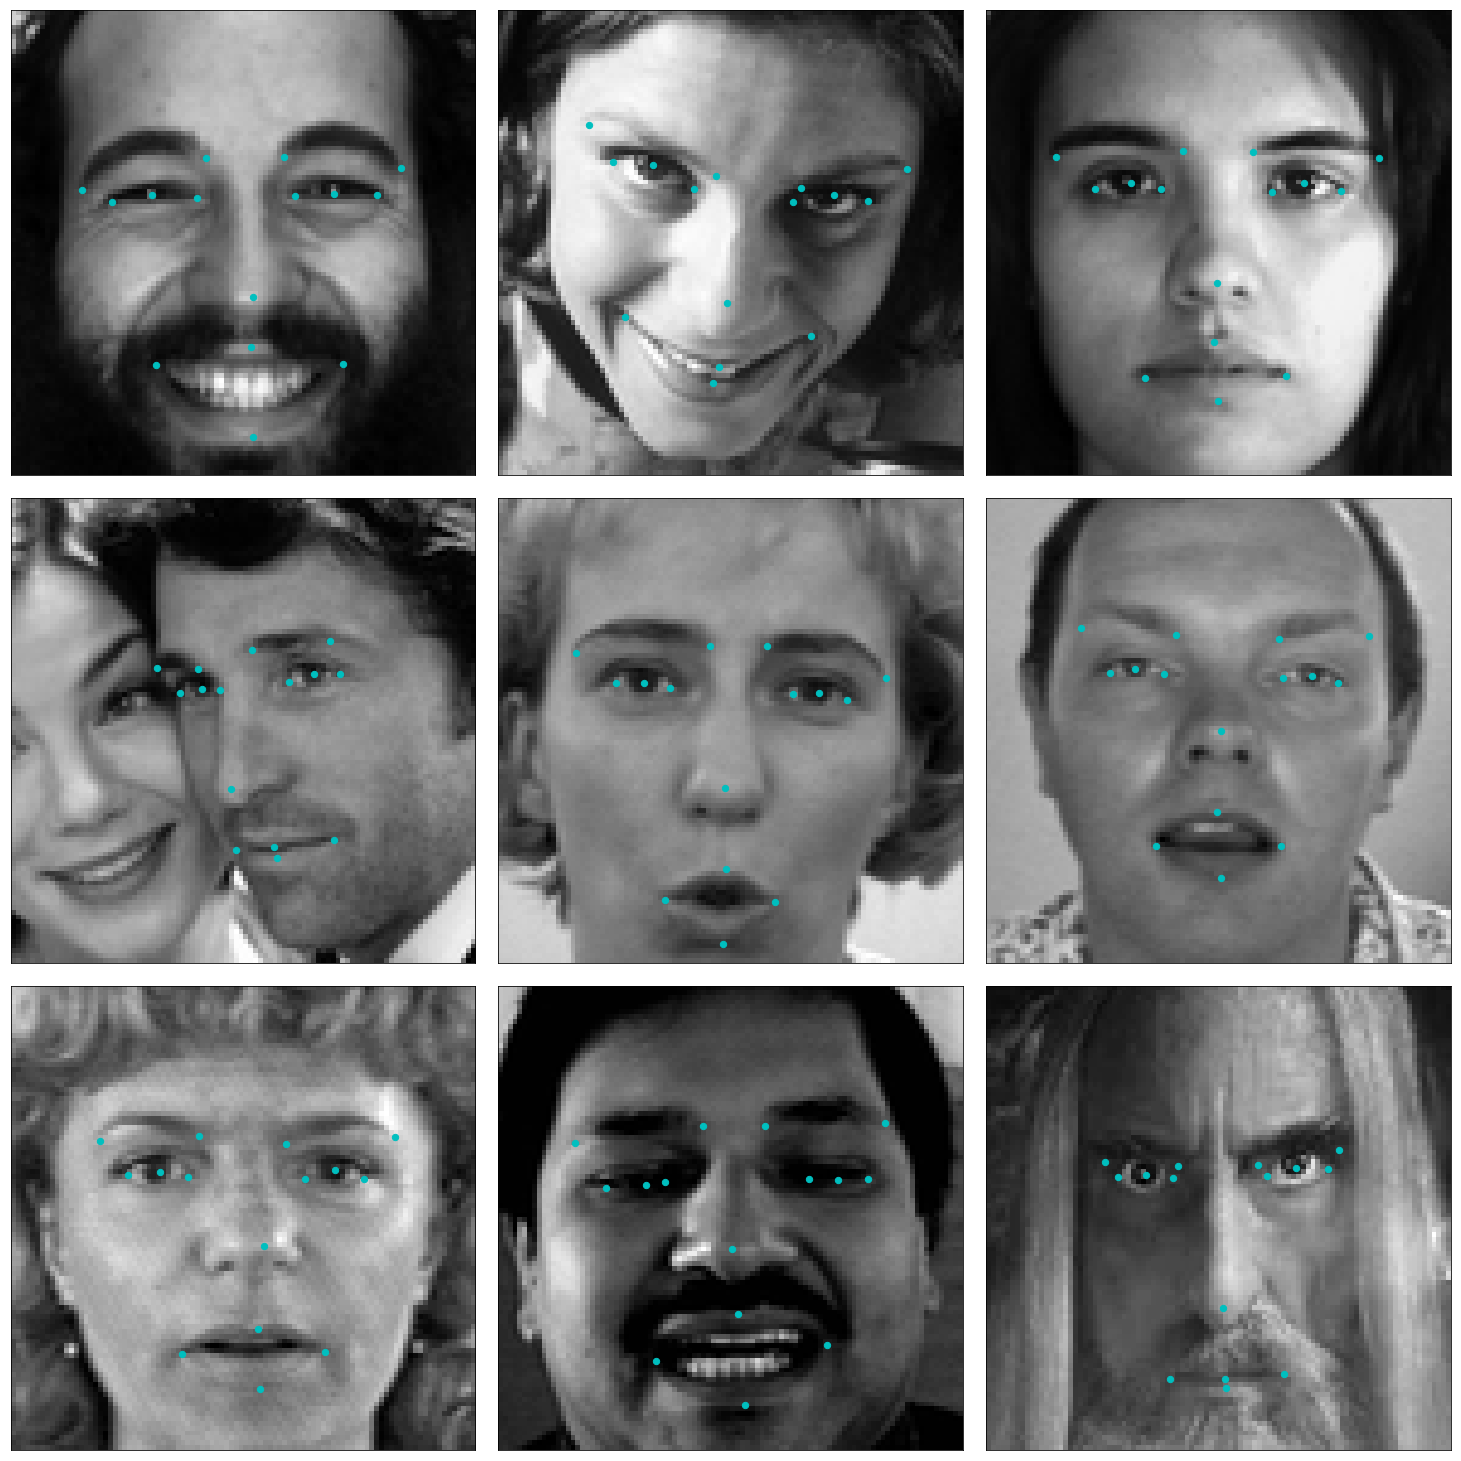

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

[ 0.4330242  -0.21624877 -0.34668279 -0.3463223   0.25858903 -0.1851669
  0.58100623 -0.1878271  -0.16970447 -0.23996718 -0.5165956  -0.35648429
  0.29375893 -0.24669313  0.74820185 -0.32774875 -0.07298451 -0.29718679
 -0.62243527 -0.51643556 -0.0278047   0.24908654  0.33497101  0.3931978
 -0.4643302   0.31000873 -0.06167792  0.52398473 -0.08612007  0.59259433]
[-0.4330242  -0.21624877  0.34668279 -0.3463223  -0.25858903 -0.1851669
 -0.58100623 -0.1878271   0.16970447 -0.23996718  0.5165956  -0.35648429
 -0.29375893 -0.24669313 -0.74820185 -0.32774875  0.07298451 -0.29718679
  0.62243527 -0.51643556  0.0278047   0.24908654 -0.33497101  0.3931978
  0.4643302   0.31000873  0.06167792  0.52398473  0.08612007  0.59259433]


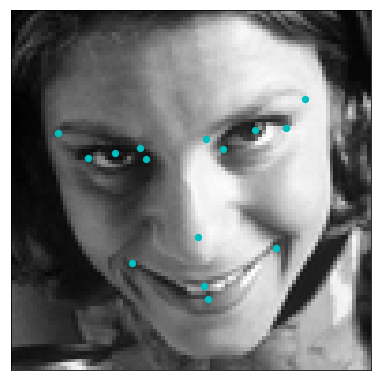

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]

fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

i = 1
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
X_flipped = X_train[i, :, ::-1, :]  # simple slice to flip all images

print(y_train[i])

y_flipped = np.zeros(y_train.shape[1])

y_flipped[1::2] = y_train[i, 1::2]   
y_flipped[::2] = y_train[i, ::2] * -1.0

print(y_flipped)

# Swap places, e.g. left_eye_center_x -> right_eye_center_x
for a, b in flip_indices:
    y_flipped[a], y_flipped[b] = (
        y_flipped[b], y_flipped[a])

plot_data(X_flipped, y_flipped, ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose.  

Review the `plot_data` function in `utils.py` to understand how the 30-dimensional training labels in `y_train` are mapped to facial locations, as this function will prove useful for your pipeline.

### (IMPLEMENTATION) Specify the CNN Architecture

In this section, you will specify a neural network for predicting the locations of facial keypoints.  Use the code cell below to specify the architecture of your neural network.  We have imported some layers that you may find useful for this task, but if you need to use more Keras layers, feel free to import them in the cell.

Your network should accept a $96 \times 96$ grayscale image as input, and it should output a vector with 30 entries, corresponding to the predicted (horizontal and vertical) locations of 15 facial keypoints.  If you are not sure where to start, you can find some useful starting architectures in [this blog](http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/), but you are not permitted to copy any of the architectures that you find online.

In [14]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Activation
from keras.layers import Flatten, Dense


## TODO: Specify a CNN architecture
# Your model should accept 96x96 pixel graysale images in
# It should have a fully-connected output layer with 30 values (2 for each facial keypoint)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(96, 96, 1)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(30))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 64)        0         
__________

---
<a id='step6'></a>

## Step 6: Compile and Train the Model

After specifying your architecture, you'll need to compile and train the model to detect facial keypoints'

### (IMPLEMENTATION) Compile and Train the Model

Use the `compile` [method](https://keras.io/models/sequential/#sequential-model-methods) to configure the learning process.  Experiment with your choice of [optimizer](https://keras.io/optimizers/); you may have some ideas about which will work best (`SGD` vs. `RMSprop`, etc), but take the time to empirically verify your theories.

Use the `fit` [method](https://keras.io/models/sequential/#sequential-model-methods) to train the model.  Break off a validation set by setting `validation_split=0.2`.  Save the returned `History` object in the `history` variable.  

Your model is required to attain a validation loss (measured as mean squared error) of at least **XYZ**.  When you have finished training, [save your model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) as an HDF5 file with file path `my_model.h5`.

In [8]:
print(X_train.shape)
print(y_train.shape)

div = X_train.shape[0] // 5
print(div)

X_train_d, X_val = np.split(X_train, [X_train.shape[0] - div])
y_train_d, y_val = np.split(y_train, [y_train.shape[0] - div])


print(X_train_d.shape)
print(X_val.shape)

print(y_train_d.shape)
print(y_val.shape)

print(np.arange(5))


(2140, 96, 96, 1)
(2140, 30)
428
(1712, 96, 96, 1)
(428, 96, 96, 1)
(1712, 30)
(428, 30)
[0 1 2 3 4]


In [ ]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint

## TODO: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## TODO: Train the model

checkpointer = ModelCheckpoint(filepath='my_model.h5',
                               verbose=1, save_best_only=True)
  

hist = model.fit(X_train, y_train, 
          epochs=1000, batch_size=214, validation_split=0.2, callbacks=[checkpointer], verbose=2)

## TODO: Save the model as model.h5
model.load_weights('my_model.h5')

In [15]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import ModelCheckpoint

BATCH_SIZE = 214
EPOCHS = 3000
## TODO: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## TODO: Train the model

checkpointer = ModelCheckpoint(filepath='my_model.h5',
                               verbose=1, save_best_only=True)
  
flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]
    
def generator_train(X, y, batch_size):
    batch_X = np.zeros((batch_size, X.shape[1], X.shape[2], X.shape[3]))
    batch_y = np.zeros((batch_size, y.shape[1]))
    
    while True:
        batch_indices = np.random.choice(X.shape[0], batch_size, replace=False)
        batch_X[:, :, :, :] = X[batch_indices, :, :, :]
        # Flip half of the images
        indices = np.random.choice(batch_size, batch_size // 2, replace=False)
        batch_X[indices] = batch_X[indices, :, ::-1, :]

        batch_y[:, :] = y[batch_indices, :]
        # Flip x coordinates of the points:
        batch_y[indices, ::2] = batch_y[indices, ::2] * -1
        
        # Swap point places
        for a, b in flip_indices:
            batch_y[indices, a], batch_y[indices, b] = (
                batch_y[indices, b], batch_y[indices, a])

        yield batch_X, batch_y

def generator_valid(X, y, batch_size):
    batch_X = np.zeros((batch_size, X.shape[1], X.shape[2], X.shape[3]))
    batch_y = np.zeros((batch_size, y.shape[1]))
    while True:
        for i in range(batch_size):
            # choose random index in features
            index= np.random.choice(len(X), 1)
            batch_X[i] = X[index]
            batch_y[i] = y[index]
    
        yield batch_X, batch_y

hist = model.fit_generator(generator_train(X_train_d, y_train_d, batch_size=BATCH_SIZE),
                    steps_per_epoch=X_train_d.shape[0] // BATCH_SIZE,
                    epochs=EPOCHS, verbose=2, callbacks=[checkpointer],
                    validation_data=(X_val, y_val))




## TODO: Save the model as model.h5
model.load_weights('my_model.h5')

Epoch 1/3000
Epoch 00000: val_loss improved from inf to 0.08117, saving model to my_model.h5
3s - loss: 0.1231 - val_loss: 0.0812
Epoch 2/3000
Epoch 00001: val_loss improved from 0.08117 to 0.02738, saving model to my_model.h5
3s - loss: 0.0401 - val_loss: 0.0274
Epoch 3/3000
Epoch 00002: val_loss improved from 0.02738 to 0.01093, saving model to my_model.h5
3s - loss: 0.0165 - val_loss: 0.0109
Epoch 4/3000
Epoch 00003: val_loss improved from 0.01093 to 0.00689, saving model to my_model.h5
3s - loss: 0.0125 - val_loss: 0.0069
Epoch 5/3000
Epoch 00004: val_loss improved from 0.00689 to 0.00507, saving model to my_model.h5
3s - loss: 0.0105 - val_loss: 0.0051
Epoch 6/3000
Epoch 00005: val_loss improved from 0.00507 to 0.00471, saving model to my_model.h5
3s - loss: 0.0098 - val_loss: 0.0047
Epoch 7/3000
Epoch 00006: val_loss did not improve
3s - loss: 0.0094 - val_loss: 0.0047
Epoch 8/3000
Epoch 00007: val_loss did not improve
3s - loss: 0.0090 - val_loss: 0.0048
Epoch 9/3000
Epoch 00008

Epoch 00083: val_loss improved from 0.00353 to 0.00333, saving model to my_model.h5
3s - loss: 0.0045 - val_loss: 0.0033
Epoch 85/3000
Epoch 00084: val_loss improved from 0.00333 to 0.00324, saving model to my_model.h5
3s - loss: 0.0043 - val_loss: 0.0032
Epoch 86/3000
Epoch 00085: val_loss improved from 0.00324 to 0.00313, saving model to my_model.h5
3s - loss: 0.0042 - val_loss: 0.0031
Epoch 87/3000
Epoch 00086: val_loss did not improve
3s - loss: 0.0042 - val_loss: 0.0033
Epoch 88/3000
Epoch 00087: val_loss improved from 0.00313 to 0.00294, saving model to my_model.h5
3s - loss: 0.0041 - val_loss: 0.0029
Epoch 89/3000
Epoch 00088: val_loss did not improve
3s - loss: 0.0041 - val_loss: 0.0031
Epoch 90/3000
Epoch 00089: val_loss did not improve
3s - loss: 0.0040 - val_loss: 0.0030
Epoch 91/3000
Epoch 00090: val_loss improved from 0.00294 to 0.00271, saving model to my_model.h5
3s - loss: 0.0039 - val_loss: 0.0027
Epoch 92/3000
Epoch 00091: val_loss improved from 0.00271 to 0.00267, sa

Epoch 00156: val_loss did not improve
3s - loss: 0.0019 - val_loss: 0.0010
Epoch 158/3000
Epoch 00157: val_loss did not improve
3s - loss: 0.0019 - val_loss: 0.0011
Epoch 159/3000
Epoch 00158: val_loss did not improve
3s - loss: 0.0019 - val_loss: 0.0012
Epoch 160/3000
Epoch 00159: val_loss did not improve
3s - loss: 0.0019 - val_loss: 0.0011
Epoch 161/3000
Epoch 00160: val_loss improved from 0.00104 to 0.00103, saving model to my_model.h5
3s - loss: 0.0019 - val_loss: 0.0010
Epoch 162/3000
Epoch 00161: val_loss improved from 0.00103 to 0.00102, saving model to my_model.h5
3s - loss: 0.0020 - val_loss: 0.0010
Epoch 163/3000
Epoch 00162: val_loss did not improve
3s - loss: 0.0019 - val_loss: 0.0011
Epoch 164/3000
Epoch 00163: val_loss did not improve
3s - loss: 0.0018 - val_loss: 0.0011
Epoch 165/3000
Epoch 00164: val_loss improved from 0.00102 to 0.00101, saving model to my_model.h5
3s - loss: 0.0019 - val_loss: 0.0010
Epoch 166/3000
Epoch 00165: val_loss did not improve
3s - loss: 0.0

Epoch 00236: val_loss did not improve
3s - loss: 0.0015 - val_loss: 9.3184e-04
Epoch 238/3000
Epoch 00237: val_loss did not improve
3s - loss: 0.0015 - val_loss: 8.5038e-04
Epoch 239/3000
Epoch 00238: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.4437e-04
Epoch 240/3000
Epoch 00239: val_loss improved from 0.00082 to 0.00082, saving model to my_model.h5
3s - loss: 0.0014 - val_loss: 8.1885e-04
Epoch 241/3000
Epoch 00240: val_loss did not improve
3s - loss: 0.0015 - val_loss: 8.7495e-04
Epoch 242/3000
Epoch 00241: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.3711e-04
Epoch 243/3000
Epoch 00242: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.3928e-04
Epoch 244/3000
Epoch 00243: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.7350e-04
Epoch 245/3000
Epoch 00244: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.4794e-04
Epoch 246/3000
Epoch 00245: val_loss did not improve
3s - loss: 0.0014 - val_loss: 8.6079e-04
Epoch 247/3000
Epoch 00246: v

Epoch 00317: val_loss improved from 0.00075 to 0.00074, saving model to my_model.h5
3s - loss: 0.0011 - val_loss: 7.3717e-04
Epoch 319/3000
Epoch 00318: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.5501e-04
Epoch 320/3000
Epoch 00319: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.9530e-04
Epoch 321/3000
Epoch 00320: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.4135e-04
Epoch 322/3000
Epoch 00321: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.6852e-04
Epoch 323/3000
Epoch 00322: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.5784e-04
Epoch 324/3000
Epoch 00323: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.4771e-04
Epoch 325/3000
Epoch 00324: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.6021e-04
Epoch 326/3000
Epoch 00325: val_loss did not improve
3s - loss: 0.0011 - val_loss: 7.8160e-04
Epoch 327/3000
Epoch 00326: val_loss did not improve
3s - loss: 0.0012 - val_loss: 7.6915e-04
Epoch 328/3000
Epoch 00327: v

Epoch 00399: val_loss did not improve
3s - loss: 9.3954e-04 - val_loss: 6.8940e-04
Epoch 401/3000
Epoch 00400: val_loss did not improve
3s - loss: 9.3559e-04 - val_loss: 6.9741e-04
Epoch 402/3000
Epoch 00401: val_loss did not improve
3s - loss: 9.1695e-04 - val_loss: 6.9269e-04
Epoch 403/3000
Epoch 00402: val_loss did not improve
3s - loss: 8.9590e-04 - val_loss: 7.0848e-04
Epoch 404/3000
Epoch 00403: val_loss did not improve
3s - loss: 9.9564e-04 - val_loss: 7.0419e-04
Epoch 405/3000
Epoch 00404: val_loss did not improve
3s - loss: 9.5785e-04 - val_loss: 7.0871e-04
Epoch 406/3000
Epoch 00405: val_loss did not improve
3s - loss: 9.6362e-04 - val_loss: 7.1580e-04
Epoch 407/3000
Epoch 00406: val_loss did not improve
3s - loss: 9.7234e-04 - val_loss: 7.0322e-04
Epoch 408/3000
Epoch 00407: val_loss did not improve
3s - loss: 8.9428e-04 - val_loss: 7.0191e-04
Epoch 409/3000
Epoch 00408: val_loss did not improve
3s - loss: 9.0313e-04 - val_loss: 7.0738e-04
Epoch 410/3000
Epoch 00409: val_los

Epoch 00479: val_loss did not improve
3s - loss: 7.8437e-04 - val_loss: 6.4174e-04
Epoch 481/3000
Epoch 00480: val_loss did not improve
3s - loss: 8.1009e-04 - val_loss: 6.7227e-04
Epoch 482/3000
Epoch 00481: val_loss did not improve
3s - loss: 7.8249e-04 - val_loss: 6.5545e-04
Epoch 483/3000
Epoch 00482: val_loss did not improve
3s - loss: 7.7810e-04 - val_loss: 6.3778e-04
Epoch 484/3000
Epoch 00483: val_loss did not improve
3s - loss: 7.9782e-04 - val_loss: 6.9558e-04
Epoch 485/3000
Epoch 00484: val_loss did not improve
3s - loss: 8.0878e-04 - val_loss: 7.1860e-04
Epoch 486/3000
Epoch 00485: val_loss did not improve
3s - loss: 7.8659e-04 - val_loss: 6.4597e-04
Epoch 487/3000
Epoch 00486: val_loss did not improve
3s - loss: 7.7034e-04 - val_loss: 6.4407e-04
Epoch 488/3000
Epoch 00487: val_loss did not improve
3s - loss: 8.1206e-04 - val_loss: 6.3640e-04
Epoch 489/3000
Epoch 00488: val_loss did not improve
3s - loss: 8.2639e-04 - val_loss: 6.6542e-04
Epoch 490/3000
Epoch 00489: val_los

Epoch 00561: val_loss did not improve
3s - loss: 7.0619e-04 - val_loss: 6.4303e-04
Epoch 563/3000
Epoch 00562: val_loss did not improve
3s - loss: 7.1804e-04 - val_loss: 6.4112e-04
Epoch 564/3000
Epoch 00563: val_loss did not improve
3s - loss: 7.2609e-04 - val_loss: 6.2917e-04
Epoch 565/3000
Epoch 00564: val_loss did not improve
3s - loss: 7.1606e-04 - val_loss: 6.1833e-04
Epoch 566/3000
Epoch 00565: val_loss did not improve
3s - loss: 7.0929e-04 - val_loss: 6.2744e-04
Epoch 567/3000
Epoch 00566: val_loss did not improve
3s - loss: 6.9521e-04 - val_loss: 6.2961e-04
Epoch 568/3000
Epoch 00567: val_loss did not improve
3s - loss: 7.1067e-04 - val_loss: 6.1912e-04
Epoch 569/3000
Epoch 00568: val_loss improved from 0.00061 to 0.00060, saving model to my_model.h5
3s - loss: 7.5720e-04 - val_loss: 5.9999e-04
Epoch 570/3000
Epoch 00569: val_loss did not improve
3s - loss: 7.0484e-04 - val_loss: 6.1509e-04
Epoch 571/3000
Epoch 00570: val_loss did not improve
3s - loss: 6.9757e-04 - val_loss: 

Epoch 00643: val_loss did not improve
3s - loss: 6.4761e-04 - val_loss: 6.0512e-04
Epoch 645/3000
Epoch 00644: val_loss did not improve
3s - loss: 6.4476e-04 - val_loss: 6.1100e-04
Epoch 646/3000
Epoch 00645: val_loss did not improve
3s - loss: 6.6565e-04 - val_loss: 6.4492e-04
Epoch 647/3000
Epoch 00646: val_loss did not improve
3s - loss: 6.6168e-04 - val_loss: 6.1253e-04
Epoch 648/3000
Epoch 00647: val_loss did not improve
3s - loss: 6.5114e-04 - val_loss: 6.0016e-04
Epoch 649/3000
Epoch 00648: val_loss did not improve
3s - loss: 6.4265e-04 - val_loss: 6.0077e-04
Epoch 650/3000
Epoch 00649: val_loss did not improve
3s - loss: 6.6707e-04 - val_loss: 5.9789e-04
Epoch 651/3000
Epoch 00650: val_loss improved from 0.00059 to 0.00059, saving model to my_model.h5
3s - loss: 6.2201e-04 - val_loss: 5.8733e-04
Epoch 652/3000
Epoch 00651: val_loss did not improve
3s - loss: 6.3880e-04 - val_loss: 5.9947e-04
Epoch 653/3000
Epoch 00652: val_loss did not improve
3s - loss: 6.2480e-04 - val_loss: 

Epoch 00726: val_loss did not improve
3s - loss: 6.0687e-04 - val_loss: 6.1194e-04
Epoch 728/3000
Epoch 00727: val_loss did not improve
3s - loss: 6.2103e-04 - val_loss: 6.0267e-04
Epoch 729/3000
Epoch 00728: val_loss did not improve
3s - loss: 6.2176e-04 - val_loss: 6.0807e-04
Epoch 730/3000
Epoch 00729: val_loss did not improve
3s - loss: 6.1410e-04 - val_loss: 6.0478e-04
Epoch 731/3000
Epoch 00730: val_loss did not improve
3s - loss: 6.0912e-04 - val_loss: 5.8830e-04
Epoch 732/3000
Epoch 00731: val_loss did not improve
3s - loss: 5.9241e-04 - val_loss: 5.8473e-04
Epoch 733/3000
Epoch 00732: val_loss did not improve
3s - loss: 6.2452e-04 - val_loss: 6.0095e-04
Epoch 734/3000
Epoch 00733: val_loss did not improve
3s - loss: 6.1644e-04 - val_loss: 6.0731e-04
Epoch 735/3000
Epoch 00734: val_loss did not improve
3s - loss: 6.2371e-04 - val_loss: 5.9093e-04
Epoch 736/3000
Epoch 00735: val_loss did not improve
3s - loss: 6.1317e-04 - val_loss: 5.9771e-04
Epoch 737/3000
Epoch 00736: val_los

Epoch 00810: val_loss did not improve
3s - loss: 5.9869e-04 - val_loss: 5.8062e-04
Epoch 812/3000
Epoch 00811: val_loss did not improve
3s - loss: 5.9666e-04 - val_loss: 6.0214e-04
Epoch 813/3000
Epoch 00812: val_loss did not improve
3s - loss: 6.1313e-04 - val_loss: 6.0242e-04
Epoch 814/3000
Epoch 00813: val_loss did not improve
3s - loss: 6.0566e-04 - val_loss: 5.9420e-04
Epoch 815/3000
Epoch 00814: val_loss did not improve
3s - loss: 6.0464e-04 - val_loss: 6.0014e-04
Epoch 816/3000
Epoch 00815: val_loss did not improve
3s - loss: 5.8277e-04 - val_loss: 5.9788e-04
Epoch 817/3000
Epoch 00816: val_loss did not improve
3s - loss: 5.9408e-04 - val_loss: 5.9991e-04
Epoch 818/3000
Epoch 00817: val_loss did not improve
3s - loss: 6.0594e-04 - val_loss: 6.0001e-04
Epoch 819/3000
Epoch 00818: val_loss did not improve
3s - loss: 6.0676e-04 - val_loss: 5.8462e-04
Epoch 820/3000
Epoch 00819: val_loss did not improve
3s - loss: 5.8347e-04 - val_loss: 5.8936e-04
Epoch 821/3000
Epoch 00820: val_los

Epoch 00894: val_loss did not improve
3s - loss: 5.6537e-04 - val_loss: 6.1461e-04
Epoch 896/3000
Epoch 00895: val_loss did not improve
3s - loss: 5.7606e-04 - val_loss: 6.0423e-04
Epoch 897/3000
Epoch 00896: val_loss did not improve
3s - loss: 5.8860e-04 - val_loss: 6.0542e-04
Epoch 898/3000
Epoch 00897: val_loss did not improve
3s - loss: 5.5481e-04 - val_loss: 5.8250e-04
Epoch 899/3000
Epoch 00898: val_loss did not improve
3s - loss: 5.6569e-04 - val_loss: 5.9160e-04
Epoch 900/3000
Epoch 00899: val_loss did not improve
3s - loss: 5.6703e-04 - val_loss: 6.1252e-04
Epoch 901/3000
Epoch 00900: val_loss did not improve
3s - loss: 5.6015e-04 - val_loss: 5.8257e-04
Epoch 902/3000
Epoch 00901: val_loss did not improve
3s - loss: 5.8187e-04 - val_loss: 5.7992e-04
Epoch 903/3000
Epoch 00902: val_loss did not improve
3s - loss: 5.8141e-04 - val_loss: 5.8376e-04
Epoch 904/3000
Epoch 00903: val_loss did not improve
3s - loss: 5.7492e-04 - val_loss: 6.0668e-04
Epoch 905/3000
Epoch 00904: val_los

Epoch 00978: val_loss did not improve
3s - loss: 5.7041e-04 - val_loss: 5.8807e-04
Epoch 980/3000
Epoch 00979: val_loss did not improve
3s - loss: 5.8099e-04 - val_loss: 5.7608e-04
Epoch 981/3000
Epoch 00980: val_loss did not improve
3s - loss: 5.5550e-04 - val_loss: 5.8177e-04
Epoch 982/3000
Epoch 00981: val_loss did not improve
3s - loss: 5.5212e-04 - val_loss: 5.9626e-04
Epoch 983/3000
Epoch 00982: val_loss did not improve
3s - loss: 5.5281e-04 - val_loss: 5.9360e-04
Epoch 984/3000
Epoch 00983: val_loss did not improve
3s - loss: 5.6060e-04 - val_loss: 6.1508e-04
Epoch 985/3000
Epoch 00984: val_loss did not improve
3s - loss: 5.5361e-04 - val_loss: 6.0789e-04
Epoch 986/3000
Epoch 00985: val_loss did not improve
3s - loss: 5.5240e-04 - val_loss: 5.8842e-04
Epoch 987/3000
Epoch 00986: val_loss did not improve
3s - loss: 5.4907e-04 - val_loss: 6.0097e-04
Epoch 988/3000
Epoch 00987: val_loss did not improve
3s - loss: 5.6072e-04 - val_loss: 5.8555e-04
Epoch 989/3000
Epoch 00988: val_los

Epoch 01061: val_loss did not improve
3s - loss: 5.8200e-04 - val_loss: 6.0785e-04
Epoch 1063/3000
Epoch 01062: val_loss did not improve
3s - loss: 5.3888e-04 - val_loss: 6.2068e-04
Epoch 1064/3000
Epoch 01063: val_loss did not improve
3s - loss: 5.5314e-04 - val_loss: 6.4144e-04
Epoch 1065/3000
Epoch 01064: val_loss did not improve
3s - loss: 5.4429e-04 - val_loss: 6.4330e-04
Epoch 1066/3000
Epoch 01065: val_loss did not improve
3s - loss: 5.6765e-04 - val_loss: 6.0958e-04
Epoch 1067/3000
Epoch 01066: val_loss did not improve
3s - loss: 5.6041e-04 - val_loss: 6.0344e-04
Epoch 1068/3000
Epoch 01067: val_loss did not improve
3s - loss: 5.6656e-04 - val_loss: 5.9944e-04
Epoch 1069/3000
Epoch 01068: val_loss did not improve
3s - loss: 5.5934e-04 - val_loss: 6.2164e-04
Epoch 1070/3000
Epoch 01069: val_loss did not improve
3s - loss: 5.4572e-04 - val_loss: 6.2457e-04
Epoch 1071/3000
Epoch 01070: val_loss did not improve
3s - loss: 5.4978e-04 - val_loss: 6.1756e-04
Epoch 1072/3000
Epoch 0107

Epoch 01144: val_loss did not improve
3s - loss: 5.7363e-04 - val_loss: 5.9867e-04
Epoch 1146/3000
Epoch 01145: val_loss did not improve
3s - loss: 5.4325e-04 - val_loss: 6.1892e-04
Epoch 1147/3000
Epoch 01146: val_loss did not improve
3s - loss: 5.4991e-04 - val_loss: 6.0249e-04
Epoch 1148/3000
Epoch 01147: val_loss did not improve
3s - loss: 5.3974e-04 - val_loss: 5.9571e-04
Epoch 1149/3000
Epoch 01148: val_loss did not improve
3s - loss: 5.2566e-04 - val_loss: 5.8653e-04
Epoch 1150/3000
Epoch 01149: val_loss did not improve
3s - loss: 5.4195e-04 - val_loss: 5.9360e-04
Epoch 1151/3000
Epoch 01150: val_loss did not improve
3s - loss: 5.3569e-04 - val_loss: 5.9808e-04
Epoch 1152/3000
Epoch 01151: val_loss did not improve
3s - loss: 5.3836e-04 - val_loss: 6.0990e-04
Epoch 1153/3000
Epoch 01152: val_loss did not improve
3s - loss: 5.4116e-04 - val_loss: 6.1541e-04
Epoch 1154/3000
Epoch 01153: val_loss did not improve
3s - loss: 5.4442e-04 - val_loss: 6.1825e-04
Epoch 1155/3000
Epoch 0115

Epoch 01227: val_loss did not improve
3s - loss: 5.2040e-04 - val_loss: 6.1751e-04
Epoch 1229/3000
Epoch 01228: val_loss did not improve
3s - loss: 5.3708e-04 - val_loss: 6.1667e-04
Epoch 1230/3000
Epoch 01229: val_loss did not improve
3s - loss: 5.1854e-04 - val_loss: 6.3474e-04
Epoch 1231/3000
Epoch 01230: val_loss did not improve
3s - loss: 5.2396e-04 - val_loss: 5.9334e-04
Epoch 1232/3000
Epoch 01231: val_loss did not improve
3s - loss: 5.2198e-04 - val_loss: 5.9753e-04
Epoch 1233/3000
Epoch 01232: val_loss did not improve
3s - loss: 5.4093e-04 - val_loss: 6.4836e-04
Epoch 1234/3000
Epoch 01233: val_loss did not improve
3s - loss: 5.5358e-04 - val_loss: 6.1931e-04
Epoch 1235/3000
Epoch 01234: val_loss did not improve
3s - loss: 5.1886e-04 - val_loss: 6.1612e-04
Epoch 1236/3000
Epoch 01235: val_loss did not improve
3s - loss: 5.4086e-04 - val_loss: 6.2243e-04
Epoch 1237/3000
Epoch 01236: val_loss did not improve
3s - loss: 5.4126e-04 - val_loss: 6.1147e-04
Epoch 1238/3000
Epoch 0123

Epoch 01310: val_loss did not improve
3s - loss: 5.5672e-04 - val_loss: 6.2735e-04
Epoch 1312/3000
Epoch 01311: val_loss did not improve
3s - loss: 5.4502e-04 - val_loss: 6.4697e-04
Epoch 1313/3000
Epoch 01312: val_loss did not improve
3s - loss: 5.2349e-04 - val_loss: 6.3430e-04
Epoch 1314/3000
Epoch 01313: val_loss did not improve
3s - loss: 5.4473e-04 - val_loss: 6.3787e-04
Epoch 1315/3000
Epoch 01314: val_loss did not improve
3s - loss: 5.2434e-04 - val_loss: 6.3864e-04
Epoch 1316/3000
Epoch 01315: val_loss did not improve
3s - loss: 5.3286e-04 - val_loss: 6.0837e-04
Epoch 1317/3000
Epoch 01316: val_loss did not improve
3s - loss: 5.2390e-04 - val_loss: 6.1971e-04
Epoch 1318/3000
Epoch 01317: val_loss did not improve
3s - loss: 5.4115e-04 - val_loss: 6.0699e-04
Epoch 1319/3000
Epoch 01318: val_loss did not improve
3s - loss: 5.2390e-04 - val_loss: 5.9629e-04
Epoch 1320/3000
Epoch 01319: val_loss did not improve
3s - loss: 5.4241e-04 - val_loss: 6.2990e-04
Epoch 1321/3000
Epoch 0132

Epoch 01393: val_loss did not improve
3s - loss: 5.3391e-04 - val_loss: 6.1073e-04
Epoch 1395/3000
Epoch 01394: val_loss did not improve
3s - loss: 5.0971e-04 - val_loss: 6.2562e-04
Epoch 1396/3000
Epoch 01395: val_loss did not improve
3s - loss: 5.3239e-04 - val_loss: 6.1903e-04
Epoch 1397/3000
Epoch 01396: val_loss did not improve
3s - loss: 5.2431e-04 - val_loss: 5.9721e-04
Epoch 1398/3000
Epoch 01397: val_loss did not improve
3s - loss: 5.1713e-04 - val_loss: 6.2021e-04
Epoch 1399/3000
Epoch 01398: val_loss did not improve
3s - loss: 5.2109e-04 - val_loss: 5.9613e-04
Epoch 1400/3000
Epoch 01399: val_loss did not improve
3s - loss: 5.1824e-04 - val_loss: 6.1593e-04
Epoch 1401/3000
Epoch 01400: val_loss did not improve
3s - loss: 5.3142e-04 - val_loss: 6.2219e-04
Epoch 1402/3000
Epoch 01401: val_loss did not improve
3s - loss: 5.2345e-04 - val_loss: 6.0573e-04
Epoch 1403/3000
Epoch 01402: val_loss did not improve
3s - loss: 5.2985e-04 - val_loss: 6.2167e-04
Epoch 1404/3000
Epoch 0140

Epoch 01476: val_loss did not improve
3s - loss: 5.2076e-04 - val_loss: 6.0509e-04
Epoch 1478/3000
Epoch 01477: val_loss did not improve
3s - loss: 5.2168e-04 - val_loss: 6.2394e-04
Epoch 1479/3000
Epoch 01478: val_loss did not improve
3s - loss: 5.0942e-04 - val_loss: 6.0040e-04
Epoch 1480/3000
Epoch 01479: val_loss did not improve
3s - loss: 5.3862e-04 - val_loss: 6.1314e-04
Epoch 1481/3000
Epoch 01480: val_loss did not improve
3s - loss: 5.3301e-04 - val_loss: 6.0212e-04
Epoch 1482/3000
Epoch 01481: val_loss did not improve
3s - loss: 5.2449e-04 - val_loss: 6.1681e-04
Epoch 1483/3000
Epoch 01482: val_loss did not improve
3s - loss: 5.3024e-04 - val_loss: 6.0991e-04
Epoch 1484/3000
Epoch 01483: val_loss did not improve
3s - loss: 5.2916e-04 - val_loss: 6.9213e-04
Epoch 1485/3000
Epoch 01484: val_loss did not improve
3s - loss: 5.2195e-04 - val_loss: 6.3232e-04
Epoch 1486/3000
Epoch 01485: val_loss did not improve
3s - loss: 5.2313e-04 - val_loss: 6.1674e-04
Epoch 1487/3000
Epoch 0148

Epoch 01559: val_loss did not improve
3s - loss: 5.0514e-04 - val_loss: 6.2744e-04
Epoch 1561/3000
Epoch 01560: val_loss did not improve
3s - loss: 5.0066e-04 - val_loss: 6.2420e-04
Epoch 1562/3000
Epoch 01561: val_loss did not improve
3s - loss: 5.2540e-04 - val_loss: 6.2958e-04
Epoch 1563/3000
Epoch 01562: val_loss did not improve
3s - loss: 5.0067e-04 - val_loss: 6.5921e-04
Epoch 1564/3000
Epoch 01563: val_loss did not improve
3s - loss: 5.2248e-04 - val_loss: 6.1311e-04
Epoch 1565/3000
Epoch 01564: val_loss did not improve
3s - loss: 4.9762e-04 - val_loss: 6.3159e-04
Epoch 1566/3000
Epoch 01565: val_loss did not improve
3s - loss: 5.4307e-04 - val_loss: 6.0871e-04
Epoch 1567/3000
Epoch 01566: val_loss did not improve
3s - loss: 5.0453e-04 - val_loss: 6.1727e-04
Epoch 1568/3000
Epoch 01567: val_loss did not improve
3s - loss: 5.1362e-04 - val_loss: 6.4248e-04
Epoch 1569/3000
Epoch 01568: val_loss did not improve
3s - loss: 4.9252e-04 - val_loss: 6.3731e-04
Epoch 1570/3000
Epoch 0156

Epoch 01642: val_loss did not improve
3s - loss: 5.1996e-04 - val_loss: 6.2129e-04
Epoch 1644/3000
Epoch 01643: val_loss did not improve
3s - loss: 5.0975e-04 - val_loss: 6.3163e-04
Epoch 1645/3000
Epoch 01644: val_loss did not improve
3s - loss: 5.0570e-04 - val_loss: 6.5928e-04
Epoch 1646/3000
Epoch 01645: val_loss did not improve
3s - loss: 5.1948e-04 - val_loss: 6.4681e-04
Epoch 1647/3000
Epoch 01646: val_loss did not improve
3s - loss: 5.0529e-04 - val_loss: 6.3592e-04
Epoch 1648/3000
Epoch 01647: val_loss did not improve
3s - loss: 5.3448e-04 - val_loss: 6.3036e-04
Epoch 1649/3000
Epoch 01648: val_loss did not improve
3s - loss: 5.0513e-04 - val_loss: 6.3917e-04
Epoch 1650/3000
Epoch 01649: val_loss did not improve
3s - loss: 5.2076e-04 - val_loss: 6.5553e-04
Epoch 1651/3000
Epoch 01650: val_loss did not improve
3s - loss: 5.1923e-04 - val_loss: 6.2982e-04
Epoch 1652/3000
Epoch 01651: val_loss did not improve
3s - loss: 5.2281e-04 - val_loss: 6.4136e-04
Epoch 1653/3000
Epoch 0165

Epoch 01725: val_loss did not improve
3s - loss: 5.0553e-04 - val_loss: 6.1457e-04
Epoch 1727/3000
Epoch 01726: val_loss did not improve
3s - loss: 5.0050e-04 - val_loss: 6.3841e-04
Epoch 1728/3000
Epoch 01727: val_loss did not improve
3s - loss: 5.0385e-04 - val_loss: 6.3929e-04
Epoch 1729/3000
Epoch 01728: val_loss did not improve
3s - loss: 5.1018e-04 - val_loss: 6.2574e-04
Epoch 1730/3000
Epoch 01729: val_loss did not improve
3s - loss: 5.0934e-04 - val_loss: 6.2656e-04
Epoch 1731/3000
Epoch 01730: val_loss did not improve
3s - loss: 5.1542e-04 - val_loss: 6.2349e-04
Epoch 1732/3000
Epoch 01731: val_loss did not improve
3s - loss: 4.9201e-04 - val_loss: 6.4347e-04
Epoch 1733/3000
Epoch 01732: val_loss did not improve
3s - loss: 5.0278e-04 - val_loss: 6.2502e-04
Epoch 1734/3000
Epoch 01733: val_loss did not improve
3s - loss: 5.0744e-04 - val_loss: 6.2839e-04
Epoch 1735/3000
Epoch 01734: val_loss did not improve
3s - loss: 4.9660e-04 - val_loss: 6.2776e-04
Epoch 1736/3000
Epoch 0173

Epoch 01808: val_loss did not improve
3s - loss: 5.1026e-04 - val_loss: 6.2453e-04
Epoch 1810/3000
Epoch 01809: val_loss did not improve
3s - loss: 4.9766e-04 - val_loss: 6.4846e-04
Epoch 1811/3000
Epoch 01810: val_loss did not improve
3s - loss: 5.2421e-04 - val_loss: 6.2725e-04
Epoch 1812/3000
Epoch 01811: val_loss did not improve
3s - loss: 5.2515e-04 - val_loss: 6.4622e-04
Epoch 1813/3000
Epoch 01812: val_loss did not improve
3s - loss: 5.0049e-04 - val_loss: 6.3104e-04
Epoch 1814/3000
Epoch 01813: val_loss did not improve
3s - loss: 4.9269e-04 - val_loss: 6.1600e-04
Epoch 1815/3000
Epoch 01814: val_loss did not improve
3s - loss: 5.1194e-04 - val_loss: 6.4404e-04
Epoch 1816/3000
Epoch 01815: val_loss did not improve
3s - loss: 5.0811e-04 - val_loss: 6.2178e-04
Epoch 1817/3000
Epoch 01816: val_loss did not improve
3s - loss: 4.8896e-04 - val_loss: 6.2327e-04
Epoch 1818/3000
Epoch 01817: val_loss did not improve
3s - loss: 5.1540e-04 - val_loss: 6.4834e-04
Epoch 1819/3000
Epoch 0181

Epoch 01891: val_loss did not improve
3s - loss: 5.0371e-04 - val_loss: 6.2924e-04
Epoch 1893/3000
Epoch 01892: val_loss did not improve
3s - loss: 4.9292e-04 - val_loss: 6.2724e-04
Epoch 1894/3000
Epoch 01893: val_loss did not improve
3s - loss: 5.0420e-04 - val_loss: 6.4234e-04
Epoch 1895/3000
Epoch 01894: val_loss did not improve
3s - loss: 4.9323e-04 - val_loss: 6.3628e-04
Epoch 1896/3000
Epoch 01895: val_loss did not improve
3s - loss: 4.8363e-04 - val_loss: 6.1726e-04
Epoch 1897/3000
Epoch 01896: val_loss did not improve
3s - loss: 5.0295e-04 - val_loss: 6.4296e-04
Epoch 1898/3000
Epoch 01897: val_loss did not improve
3s - loss: 5.1885e-04 - val_loss: 6.2727e-04
Epoch 1899/3000
Epoch 01898: val_loss did not improve
3s - loss: 5.1006e-04 - val_loss: 6.3479e-04
Epoch 1900/3000
Epoch 01899: val_loss did not improve
3s - loss: 4.9650e-04 - val_loss: 6.2516e-04
Epoch 1901/3000
Epoch 01900: val_loss did not improve
3s - loss: 4.9043e-04 - val_loss: 6.3760e-04
Epoch 1902/3000
Epoch 0190

Epoch 01974: val_loss did not improve
3s - loss: 5.0644e-04 - val_loss: 6.2739e-04
Epoch 1976/3000
Epoch 01975: val_loss did not improve
3s - loss: 4.9535e-04 - val_loss: 6.1858e-04
Epoch 1977/3000
Epoch 01976: val_loss did not improve
3s - loss: 5.0114e-04 - val_loss: 6.3978e-04
Epoch 1978/3000
Epoch 01977: val_loss did not improve
3s - loss: 5.1266e-04 - val_loss: 6.4431e-04
Epoch 1979/3000
Epoch 01978: val_loss did not improve
3s - loss: 5.1254e-04 - val_loss: 6.0676e-04
Epoch 1980/3000
Epoch 01979: val_loss did not improve
3s - loss: 4.9301e-04 - val_loss: 6.4155e-04
Epoch 1981/3000
Epoch 01980: val_loss did not improve
3s - loss: 5.0688e-04 - val_loss: 6.5725e-04
Epoch 1982/3000
Epoch 01981: val_loss did not improve
3s - loss: 4.9913e-04 - val_loss: 6.2728e-04
Epoch 1983/3000
Epoch 01982: val_loss did not improve
3s - loss: 4.9306e-04 - val_loss: 6.5167e-04
Epoch 1984/3000
Epoch 01983: val_loss did not improve
3s - loss: 5.0247e-04 - val_loss: 6.4013e-04
Epoch 1985/3000
Epoch 0198

Epoch 02057: val_loss did not improve
3s - loss: 5.1338e-04 - val_loss: 6.3167e-04
Epoch 2059/3000
Epoch 02058: val_loss did not improve
3s - loss: 4.9439e-04 - val_loss: 6.6439e-04
Epoch 2060/3000
Epoch 02059: val_loss did not improve
3s - loss: 4.9622e-04 - val_loss: 6.3773e-04
Epoch 2061/3000
Epoch 02060: val_loss did not improve
3s - loss: 4.8220e-04 - val_loss: 6.5193e-04
Epoch 2062/3000
Epoch 02061: val_loss did not improve
3s - loss: 4.8969e-04 - val_loss: 6.4997e-04
Epoch 2063/3000
Epoch 02062: val_loss did not improve
3s - loss: 5.0496e-04 - val_loss: 6.3884e-04
Epoch 2064/3000
Epoch 02063: val_loss did not improve
3s - loss: 5.0240e-04 - val_loss: 6.4177e-04
Epoch 2065/3000
Epoch 02064: val_loss did not improve
3s - loss: 5.1252e-04 - val_loss: 6.5406e-04
Epoch 2066/3000
Epoch 02065: val_loss did not improve
3s - loss: 5.0914e-04 - val_loss: 6.4756e-04
Epoch 2067/3000
Epoch 02066: val_loss did not improve
3s - loss: 5.0456e-04 - val_loss: 6.4283e-04
Epoch 2068/3000
Epoch 0206

Epoch 02140: val_loss did not improve
3s - loss: 5.1632e-04 - val_loss: 6.6863e-04
Epoch 2142/3000
Epoch 02141: val_loss did not improve
3s - loss: 5.0363e-04 - val_loss: 6.2429e-04
Epoch 2143/3000
Epoch 02142: val_loss did not improve
3s - loss: 5.0078e-04 - val_loss: 6.6289e-04
Epoch 2144/3000
Epoch 02143: val_loss did not improve
3s - loss: 4.9008e-04 - val_loss: 6.1264e-04
Epoch 2145/3000
Epoch 02144: val_loss did not improve
3s - loss: 5.1899e-04 - val_loss: 6.6931e-04
Epoch 2146/3000
Epoch 02145: val_loss did not improve
3s - loss: 4.9873e-04 - val_loss: 6.5580e-04
Epoch 2147/3000
Epoch 02146: val_loss did not improve
3s - loss: 5.1785e-04 - val_loss: 6.4138e-04
Epoch 2148/3000
Epoch 02147: val_loss did not improve
3s - loss: 4.9037e-04 - val_loss: 6.3519e-04
Epoch 2149/3000
Epoch 02148: val_loss did not improve
3s - loss: 4.8569e-04 - val_loss: 6.3968e-04
Epoch 2150/3000
Epoch 02149: val_loss did not improve
3s - loss: 4.9130e-04 - val_loss: 6.6132e-04
Epoch 2151/3000
Epoch 0215

Epoch 02223: val_loss did not improve
3s - loss: 4.8565e-04 - val_loss: 6.7766e-04
Epoch 2225/3000
Epoch 02224: val_loss did not improve
3s - loss: 4.7041e-04 - val_loss: 6.4754e-04
Epoch 2226/3000
Epoch 02225: val_loss did not improve
3s - loss: 5.0426e-04 - val_loss: 6.5065e-04
Epoch 2227/3000
Epoch 02226: val_loss did not improve
3s - loss: 4.7779e-04 - val_loss: 6.6544e-04
Epoch 2228/3000
Epoch 02227: val_loss did not improve
3s - loss: 4.7768e-04 - val_loss: 6.3299e-04
Epoch 2229/3000
Epoch 02228: val_loss did not improve
3s - loss: 5.0352e-04 - val_loss: 6.3958e-04
Epoch 2230/3000
Epoch 02229: val_loss did not improve
3s - loss: 4.9703e-04 - val_loss: 6.5591e-04
Epoch 2231/3000
Epoch 02230: val_loss did not improve
3s - loss: 4.8507e-04 - val_loss: 6.4282e-04
Epoch 2232/3000
Epoch 02231: val_loss did not improve
3s - loss: 4.8648e-04 - val_loss: 6.5321e-04
Epoch 2233/3000
Epoch 02232: val_loss did not improve
3s - loss: 4.8655e-04 - val_loss: 6.3996e-04
Epoch 2234/3000
Epoch 0223

Epoch 02306: val_loss did not improve
2s - loss: 4.7601e-04 - val_loss: 6.4123e-04
Epoch 2308/3000
Epoch 02307: val_loss did not improve
3s - loss: 4.7911e-04 - val_loss: 6.6237e-04
Epoch 2309/3000
Epoch 02308: val_loss did not improve
3s - loss: 4.9436e-04 - val_loss: 6.5067e-04
Epoch 2310/3000
Epoch 02309: val_loss did not improve
3s - loss: 4.9961e-04 - val_loss: 6.5409e-04
Epoch 2311/3000
Epoch 02310: val_loss did not improve
3s - loss: 4.8100e-04 - val_loss: 6.3809e-04
Epoch 2312/3000
Epoch 02311: val_loss did not improve
3s - loss: 5.0582e-04 - val_loss: 6.4889e-04
Epoch 2313/3000
Epoch 02312: val_loss did not improve
3s - loss: 5.0468e-04 - val_loss: 6.4799e-04
Epoch 2314/3000
Epoch 02313: val_loss did not improve
3s - loss: 4.8943e-04 - val_loss: 6.5359e-04
Epoch 2315/3000
Epoch 02314: val_loss did not improve
3s - loss: 4.9503e-04 - val_loss: 6.4584e-04
Epoch 2316/3000
Epoch 02315: val_loss did not improve
3s - loss: 5.0349e-04 - val_loss: 6.6075e-04
Epoch 2317/3000
Epoch 0231

Epoch 02389: val_loss did not improve
3s - loss: 5.0072e-04 - val_loss: 6.5369e-04
Epoch 2391/3000
Epoch 02390: val_loss did not improve
3s - loss: 4.8814e-04 - val_loss: 6.4375e-04
Epoch 2392/3000
Epoch 02391: val_loss did not improve
3s - loss: 4.9445e-04 - val_loss: 6.3197e-04
Epoch 2393/3000
Epoch 02392: val_loss did not improve
3s - loss: 4.9052e-04 - val_loss: 6.3486e-04
Epoch 2394/3000
Epoch 02393: val_loss did not improve
3s - loss: 4.9563e-04 - val_loss: 6.4566e-04
Epoch 2395/3000
Epoch 02394: val_loss did not improve
3s - loss: 4.8727e-04 - val_loss: 6.5984e-04
Epoch 2396/3000
Epoch 02395: val_loss did not improve
3s - loss: 5.0346e-04 - val_loss: 6.6212e-04
Epoch 2397/3000
Epoch 02396: val_loss did not improve
3s - loss: 5.1040e-04 - val_loss: 6.5525e-04
Epoch 2398/3000
Epoch 02397: val_loss did not improve
3s - loss: 5.0621e-04 - val_loss: 6.4535e-04
Epoch 2399/3000
Epoch 02398: val_loss did not improve
3s - loss: 4.9577e-04 - val_loss: 6.5311e-04
Epoch 2400/3000
Epoch 0239

Epoch 02472: val_loss did not improve
3s - loss: 4.9318e-04 - val_loss: 6.4031e-04
Epoch 2474/3000
Epoch 02473: val_loss did not improve
3s - loss: 4.8513e-04 - val_loss: 6.4784e-04
Epoch 2475/3000
Epoch 02474: val_loss did not improve
3s - loss: 4.9635e-04 - val_loss: 6.5137e-04
Epoch 2476/3000
Epoch 02475: val_loss did not improve
3s - loss: 4.8125e-04 - val_loss: 6.4529e-04
Epoch 2477/3000
Epoch 02476: val_loss did not improve
3s - loss: 4.8955e-04 - val_loss: 6.4054e-04
Epoch 2478/3000
Epoch 02477: val_loss did not improve
3s - loss: 4.8496e-04 - val_loss: 6.2853e-04
Epoch 2479/3000
Epoch 02478: val_loss did not improve
3s - loss: 4.8852e-04 - val_loss: 6.5015e-04
Epoch 2480/3000
Epoch 02479: val_loss did not improve
3s - loss: 4.7519e-04 - val_loss: 6.2600e-04
Epoch 2481/3000
Epoch 02480: val_loss did not improve
3s - loss: 4.9064e-04 - val_loss: 6.5218e-04
Epoch 2482/3000
Epoch 02481: val_loss did not improve
3s - loss: 4.8641e-04 - val_loss: 6.5630e-04
Epoch 2483/3000
Epoch 0248

Epoch 02555: val_loss did not improve
2s - loss: 4.8859e-04 - val_loss: 6.5134e-04
Epoch 2557/3000
Epoch 02556: val_loss did not improve
3s - loss: 4.8203e-04 - val_loss: 6.5920e-04
Epoch 2558/3000
Epoch 02557: val_loss did not improve
3s - loss: 4.7011e-04 - val_loss: 6.4727e-04
Epoch 2559/3000
Epoch 02558: val_loss did not improve
3s - loss: 4.8396e-04 - val_loss: 6.3479e-04
Epoch 2560/3000
Epoch 02559: val_loss did not improve
3s - loss: 4.7104e-04 - val_loss: 6.8477e-04
Epoch 2561/3000
Epoch 02560: val_loss did not improve
3s - loss: 4.7801e-04 - val_loss: 6.3893e-04
Epoch 2562/3000
Epoch 02561: val_loss did not improve
3s - loss: 4.8423e-04 - val_loss: 6.4234e-04
Epoch 2563/3000
Epoch 02562: val_loss did not improve
3s - loss: 4.7227e-04 - val_loss: 6.6861e-04
Epoch 2564/3000
Epoch 02563: val_loss did not improve
3s - loss: 4.8187e-04 - val_loss: 6.5414e-04
Epoch 2565/3000
Epoch 02564: val_loss did not improve
3s - loss: 4.8855e-04 - val_loss: 6.5757e-04
Epoch 2566/3000
Epoch 0256

Epoch 02638: val_loss did not improve
3s - loss: 4.7968e-04 - val_loss: 6.6348e-04
Epoch 2640/3000
Epoch 02639: val_loss did not improve
3s - loss: 4.6214e-04 - val_loss: 6.5956e-04
Epoch 2641/3000
Epoch 02640: val_loss did not improve
3s - loss: 4.7518e-04 - val_loss: 6.3980e-04
Epoch 2642/3000
Epoch 02641: val_loss did not improve
3s - loss: 4.9002e-04 - val_loss: 6.5030e-04
Epoch 2643/3000
Epoch 02642: val_loss did not improve
3s - loss: 4.6975e-04 - val_loss: 6.5212e-04
Epoch 2644/3000
Epoch 02643: val_loss did not improve
3s - loss: 4.8454e-04 - val_loss: 6.5312e-04
Epoch 2645/3000
Epoch 02644: val_loss did not improve
3s - loss: 4.7173e-04 - val_loss: 6.5813e-04
Epoch 2646/3000
Epoch 02645: val_loss did not improve
3s - loss: 4.7676e-04 - val_loss: 6.6137e-04
Epoch 2647/3000
Epoch 02646: val_loss did not improve
3s - loss: 4.8176e-04 - val_loss: 6.6114e-04
Epoch 2648/3000
Epoch 02647: val_loss did not improve
3s - loss: 4.8414e-04 - val_loss: 6.5897e-04
Epoch 2649/3000
Epoch 0264

Epoch 02721: val_loss did not improve
3s - loss: 4.7329e-04 - val_loss: 6.7668e-04
Epoch 2723/3000
Epoch 02722: val_loss did not improve
3s - loss: 4.7264e-04 - val_loss: 6.8983e-04
Epoch 2724/3000
Epoch 02723: val_loss did not improve
3s - loss: 4.8853e-04 - val_loss: 6.6751e-04
Epoch 2725/3000
Epoch 02724: val_loss did not improve
3s - loss: 4.8571e-04 - val_loss: 6.5291e-04
Epoch 2726/3000
Epoch 02725: val_loss did not improve
3s - loss: 4.8175e-04 - val_loss: 6.5069e-04
Epoch 2727/3000
Epoch 02726: val_loss did not improve
3s - loss: 4.9243e-04 - val_loss: 6.5674e-04
Epoch 2728/3000
Epoch 02727: val_loss did not improve
3s - loss: 4.7513e-04 - val_loss: 6.3523e-04
Epoch 2729/3000
Epoch 02728: val_loss did not improve
2s - loss: 4.8988e-04 - val_loss: 6.7274e-04
Epoch 2730/3000
Epoch 02729: val_loss did not improve
3s - loss: 4.7486e-04 - val_loss: 6.7292e-04
Epoch 2731/3000
Epoch 02730: val_loss did not improve
3s - loss: 4.8833e-04 - val_loss: 6.4705e-04
Epoch 2732/3000
Epoch 0273

Epoch 02804: val_loss did not improve
3s - loss: 4.8435e-04 - val_loss: 6.3515e-04
Epoch 2806/3000
Epoch 02805: val_loss did not improve
3s - loss: 5.0136e-04 - val_loss: 6.6131e-04
Epoch 2807/3000
Epoch 02806: val_loss did not improve
3s - loss: 4.8131e-04 - val_loss: 6.4046e-04
Epoch 2808/3000
Epoch 02807: val_loss did not improve
3s - loss: 5.0923e-04 - val_loss: 6.5347e-04
Epoch 2809/3000
Epoch 02808: val_loss did not improve
3s - loss: 4.7772e-04 - val_loss: 6.5719e-04
Epoch 2810/3000
Epoch 02809: val_loss did not improve
3s - loss: 4.8666e-04 - val_loss: 6.4297e-04
Epoch 2811/3000
Epoch 02810: val_loss did not improve
3s - loss: 5.0103e-04 - val_loss: 6.6398e-04
Epoch 2812/3000
Epoch 02811: val_loss did not improve
3s - loss: 4.6972e-04 - val_loss: 6.5431e-04
Epoch 2813/3000
Epoch 02812: val_loss did not improve
3s - loss: 4.9023e-04 - val_loss: 6.5992e-04
Epoch 2814/3000
Epoch 02813: val_loss did not improve
3s - loss: 4.8116e-04 - val_loss: 6.6715e-04
Epoch 2815/3000
Epoch 0281

Epoch 02887: val_loss did not improve
3s - loss: 4.6826e-04 - val_loss: 6.5439e-04
Epoch 2889/3000
Epoch 02888: val_loss did not improve
3s - loss: 4.8471e-04 - val_loss: 6.5900e-04
Epoch 2890/3000
Epoch 02889: val_loss did not improve
3s - loss: 4.8465e-04 - val_loss: 6.4860e-04
Epoch 2891/3000
Epoch 02890: val_loss did not improve
3s - loss: 4.9753e-04 - val_loss: 6.4300e-04
Epoch 2892/3000
Epoch 02891: val_loss did not improve
3s - loss: 4.7912e-04 - val_loss: 6.7856e-04
Epoch 2893/3000
Epoch 02892: val_loss did not improve
3s - loss: 4.8683e-04 - val_loss: 6.6620e-04
Epoch 2894/3000
Epoch 02893: val_loss did not improve
2s - loss: 4.6137e-04 - val_loss: 6.6094e-04
Epoch 2895/3000
Epoch 02894: val_loss did not improve
3s - loss: 4.6574e-04 - val_loss: 6.4893e-04
Epoch 2896/3000
Epoch 02895: val_loss did not improve
3s - loss: 4.8898e-04 - val_loss: 6.6660e-04
Epoch 2897/3000
Epoch 02896: val_loss did not improve
3s - loss: 4.7980e-04 - val_loss: 6.8919e-04
Epoch 2898/3000
Epoch 0289

Epoch 02970: val_loss did not improve
3s - loss: 4.8842e-04 - val_loss: 6.5510e-04
Epoch 2972/3000
Epoch 02971: val_loss did not improve
3s - loss: 4.7815e-04 - val_loss: 6.5916e-04
Epoch 2973/3000
Epoch 02972: val_loss did not improve
3s - loss: 4.8496e-04 - val_loss: 6.5934e-04
Epoch 2974/3000
Epoch 02973: val_loss did not improve
3s - loss: 4.8171e-04 - val_loss: 6.6626e-04
Epoch 2975/3000
Epoch 02974: val_loss did not improve
2s - loss: 4.7754e-04 - val_loss: 6.4137e-04
Epoch 2976/3000
Epoch 02975: val_loss did not improve
3s - loss: 5.0173e-04 - val_loss: 6.5016e-04
Epoch 2977/3000
Epoch 02976: val_loss did not improve
3s - loss: 4.6623e-04 - val_loss: 6.6463e-04
Epoch 2978/3000
Epoch 02977: val_loss did not improve
3s - loss: 4.7916e-04 - val_loss: 6.4282e-04
Epoch 2979/3000
Epoch 02978: val_loss did not improve
3s - loss: 4.6662e-04 - val_loss: 6.7227e-04
Epoch 2980/3000
Epoch 02979: val_loss did not improve
3s - loss: 4.8267e-04 - val_loss: 6.7165e-04
Epoch 2981/3000
Epoch 0298

---
<a id='step7'></a>

## Step 7: Visualize the Loss and Test Predictions

### (IMPLEMENTATION)  Answer a few questions and visualize the loss

__Question 1:__ Outline the steps you took to get to your final neural network architecture and your reasoning at each step.

__Answer:__


__Question 2:__ Defend your choice of optimizer.  Which optimizers did you test, and how did you determine which worked best?

__Answer:__ 


Use the code cell below to plot the training and validation loss of your neural network.  You may find [this resource](http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/) useful.

dict_keys(['loss', 'val_loss'])


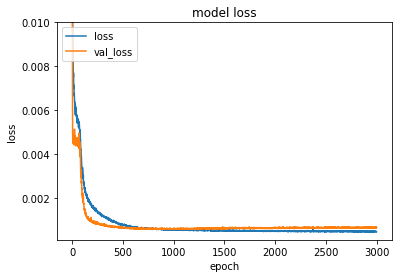

In [16]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(hist.history.keys())

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(1e-4, 1e-2)
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

__Question 3:__  Do you notice any evidence of overfitting or underfitting in the above plot?  If so, what steps have you taken to improve your model?  Note that slight overfitting or underfitting will not hurt your chances of a successful submission, as long as you have attempted some solutions towards improving your model (such as _regularization, dropout, increased/decreased number of layers, etc_).

__Answer:__

### Visualize a Subset of the Test Predictions

Execute the code cell below to visualize your model's predicted keypoints on a subset of the testing images.

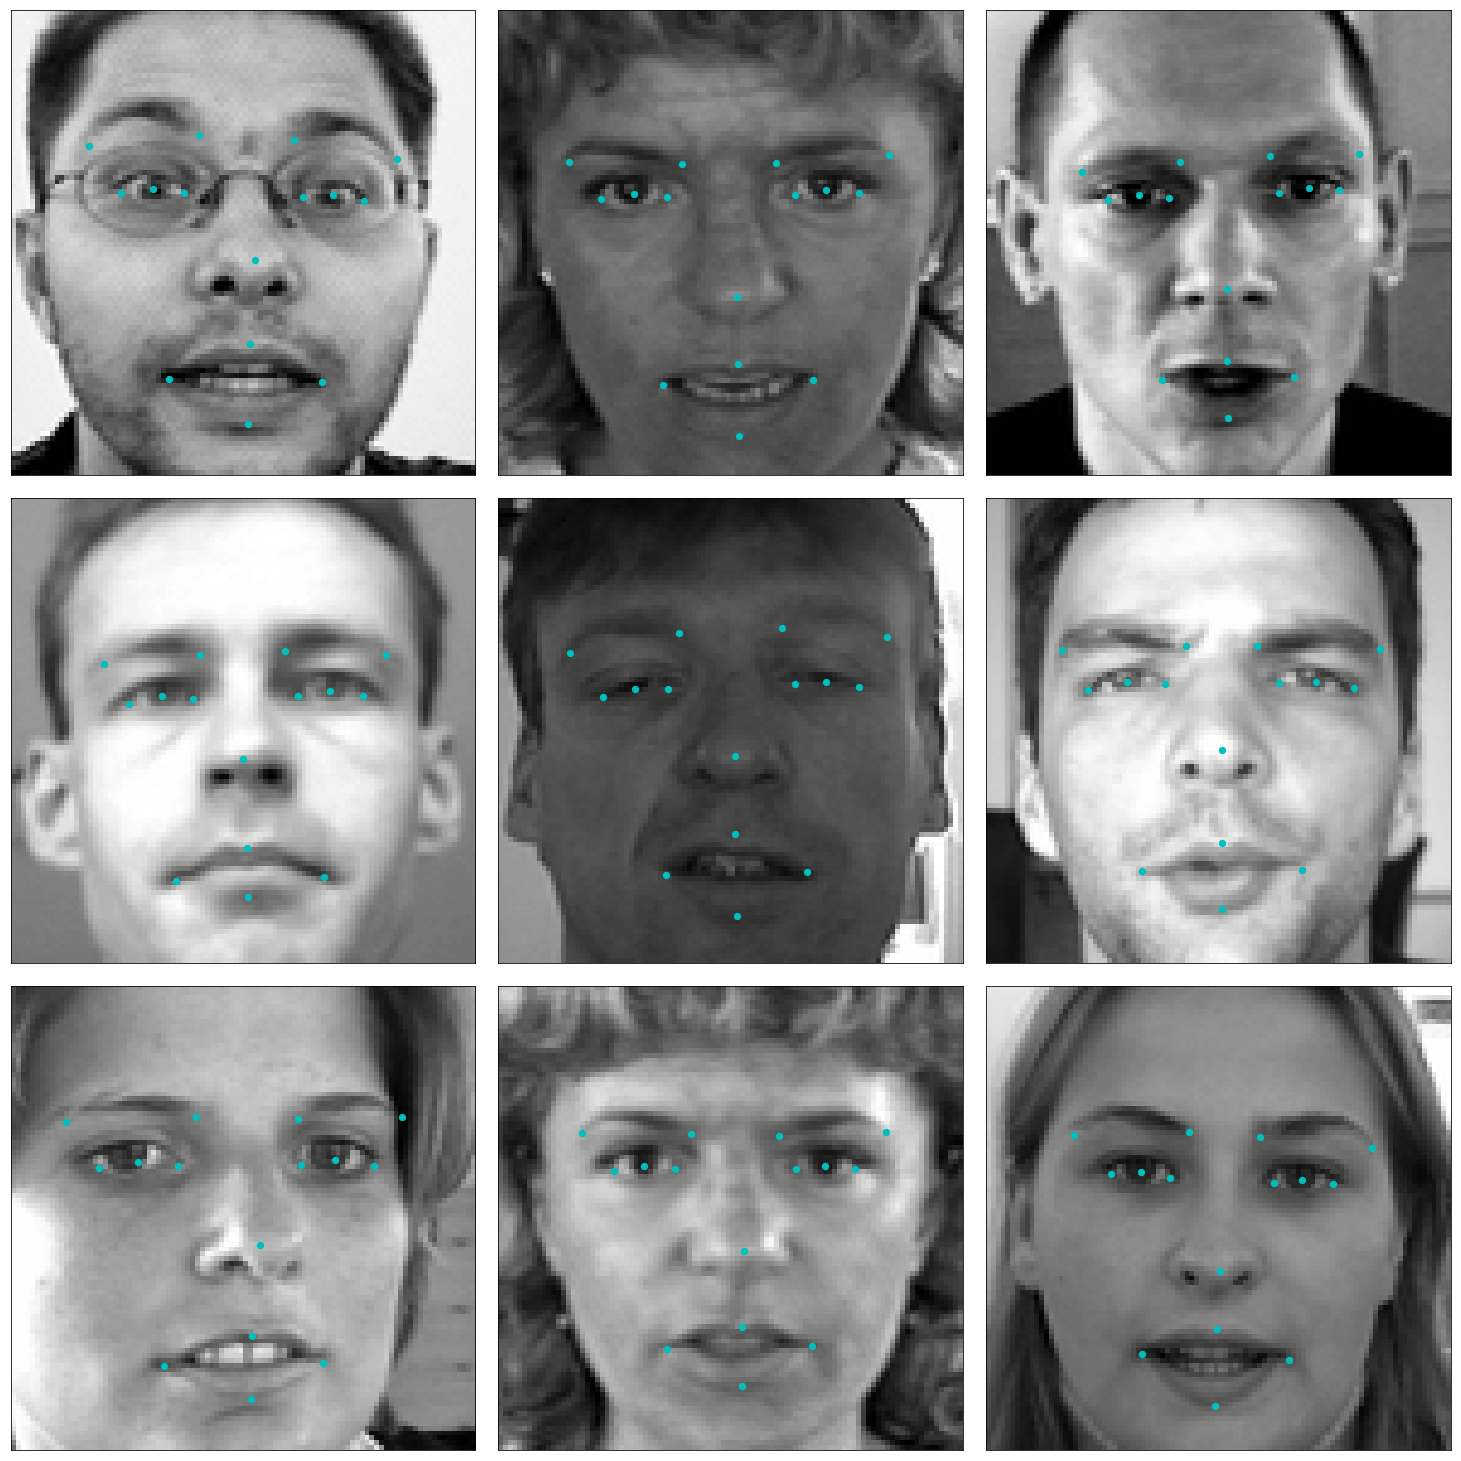

In [17]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

---
<a id='step8'></a>

## Step 8: Complete the pipeline

With the work you did in Sections 1 and 2 of this notebook, along with your freshly trained facial keypoint detector, you can now complete the full pipeline.  That is given a color image containing a person or persons you can now 

- Detect the faces in this image automatically using OpenCV
- Predict the facial keypoints in each face detected in the image
- Paint predicted keypoints on each face detected

In this Subsection you will do just this!  

### (IMPLEMENTATION) Facial Keypoints Detector

Use the OpenCV face detection functionality you built in previous Sections to expand the functionality of your keypoints detector to color images with arbitrary size.  Your function should perform the following steps

1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.
4. Locate the facial keypoints in the cropped image.
5. Overlay the facial keypoints in the original (color, uncropped) image.

**Note**: step 4 can be the trickiest because remember your convolutional network is only trained to detect facial keypoints in $96 \times 96$ grayscale images where each pixel was normalized to lie in the interval $[0,1]$, and remember that each facial keypoint was normalized during training to the interval $[-1,1]$.  This means - practically speaking - to paint detected keypoints onto a test face you need to perform this same pre-processing to your candidate face  - that is after detecting it you should resize it to $96 \times 96$ and normalize its values before feeding it into your facial keypoint detector.  To be shown correctly on the original image the output keypoints from your detector then need to be shifted and re-normalized from the interval $[-1,1]$ to the width and height of your detected face.

When complete you should be able to produce example images like the one below

<img src="images/obamas_with_keypoints.png" width=1000 height=1000/>

In [ ]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')


# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image')
ax1.imshow(image)



In [ ]:
### TODO: Use the face detection code we saw in Section 1 with your trained conv-net 

# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

image_copy = np.copy(image)

coord_X = list()
coord_Y = list()
# Get the bounding box for each detected face
for (x,y,w,h) in faces:
 
    # Crop the face image
    face_image = gray[y:y+h, x:x+w]
    face_image = cv2.resize(face_image, (96, 96), interpolation=cv2.INTER_CUBIC)

    # Scale pixels and reshape for prediction
    X = face_image / 255.
    X = X.astype(np.float32)
    X = X.reshape(-1, 96, 96, 1)
    
    # Predict keypoints
    res = model.predict(X)
    
    # Get keypoint coordinates on the original image
    res_X = np.squeeze(res)[0::2] * w / 2 + w / 2 + x
    res_Y = np.squeeze(res)[1::2] * h / 2 + h / 2 + y  
    
    # Save the coordinates 
    coord_X.append(np.array(res_X))
    coord_Y.append(np.array(res_Y))
    
    # Add a red bounding box to the detections image
    cv2.rectangle(image_copy, (x,y), (x+w,y+h), (255,0,0), 3)
    

    
# Plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_copy)

## TODO : Paint the predicted keypoints on the test image
keypoints_X = np.array(coord_X)
keypoints_Y = np.array(coord_Y)
ax1.scatter(keypoints_X, keypoints_Y, marker='o', c='c', s=5)



### (Optional) Further Directions - add a filter using facial keypoints to your laptop camera

Now you can add facial keypoint detection to your laptop camera - as illustrated in the gif below.

<img src="images/facial_keypoint_test.gif" width=400 height=300/>

The next Python cell contains the basic laptop video camera function used in the previous optional video exercises.  Combine it with the functionality you developed for keypoint detection and marking in the previous exercise and you should be good to go!

In [ ]:
import cv2
import time 
from keras.models import load_model
def laptop_camera_go():
    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # Try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Extract the pre-trained face detector from an xml file
    face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

    # keep video stream open
    while rval:
        # Convert the RGB  image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # Detect the faces in image
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)

        image_copy = np.copy(frame)

        # Get the bounding box for each detected face
        for (x,y,w,h) in faces:
 
            # Crop the face image
            face_image = gray[y:y+h, x:x+w]
            face_image = cv2.resize(face_image, (96, 96), interpolation=cv2.INTER_CUBIC)

            # Scale pixels and reshape for prediction
            X = face_image / 255.
            X = X.astype(np.float32)
            X = X.reshape(-1, 96, 96, 1)
    
            # Predict keypoints
            res = model.predict(X)
    
            # Get keypoint coordinates on the original image
            res_X = np.squeeze(res)[0::2] * w / 2 + w / 2 + x
            res_Y = np.squeeze(res)[1::2] * h / 2 + h / 2 + y  
    
            for i, c_x in enumerate(res_X):
                cv2.circle(image_copy, (int(c_x), int(res_Y[i])), 2, (0,255,0), -1)
        
            # Add a red bounding box to the detections image
            cv2.rectangle(image_copy, (x,y), (x+w,y+h), (255,0,0), 3)
            
        # plot image from camera with detections marked
        cv2.imshow("face detection activated", image_copy)
        
        # exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            vc.release()

            # destroy windows
            cv2.destroyAllWindows()
            
            # hack from stack overflow for making sure window closes on osx --> https://stackoverflow.com/questions/6116564/destroywindow-does-not-close-window-on-mac-using-python-and-opencv
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()  

In [ ]:
# Run your keypoint face painter
laptop_camera_go()

### (Optional) Further Directions - add a filter using facial keypoints

Using your freshly minted facial keypoint detector pipeline you can now do things like add fun filters to a person's face automatically.  In this optional exercise you can play around with adding sunglasses automatically to each individual's face in an image as shown in a demonstration image below.

<img src="images/obamas_with_shades.png" width=1000 height=1000/>

To produce this effect an image of a pair of sunglasses shown in the Python cell below.

In [ ]:
# Load in sunglasses image - note the usage of the special option
# cv2.IMREAD_UNCHANGED, this option is used because the sunglasses 
# image has a 4th channel that allows us to control how transparent each pixel in the image is
sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

# Plot the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(sunglasses)
ax1.axis('off');

This image is placed over each individual's face using the detected eye points to determine the location of the sunglasses, and eyebrow points to determine the size that the sunglasses should be for each person (one could also use the nose point to determine this).  

Notice that this image actually has *4 channels*, not just 3. 

In [ ]:
# Print out the shape of the sunglasses image
print ('The sunglasses image has shape: ' + str(np.shape(sunglasses)))

It has the usual red, blue, and green channels any color image has, with the 4th channel representing the transparency level of each pixel in the image.  Here's how the transparency channel works: the lower the value, the more transparent the pixel will become.  The lower bound (completely transparent) is zero here, so any pixels set to 0 will not be seen. 

This is how we can place this image of sunglasses on someone's face and still see the area around of their face where the sunglasses lie - because these pixels in the sunglasses image have been made completely transparent.

Lets check out the alpha channel of our sunglasses image in the next Python cell.  Note because many of the pixels near the boundary are transparent we'll need to explicitly print out non-zero values if we want to see them. 

In [ ]:
# Print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('the alpha channel here looks like')
print (alpha_channel)

# Just to double check that there are indeed non-zero values
# Let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('\n the non-zero values of the alpha channel look like')
print (values)

This means that when we place this sunglasses image on top of another image, we can use the transparency channel as a filter to tell us which pixels to overlay on a new image (only the non-transparent ones with values greater than zero).

One last thing: it's helpful to understand which keypoint belongs to the eyes, mouth, etc. So, in the image below, we also display the index of each facial keypoint directly on the image so that you can tell which keypoints are for the eyes, eyebrows, etc.

<img src="images/obamas_points_numbered.png" width=500 height=500/>

With this information, you're well on your way to completing this filtering task!  See if you can place the sunglasses automatically on the individuals in the image loaded in / shown in the next Python cell.

In [ ]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Plot the image
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

In [ ]:
## (Optional) TODO: Use the face detection code we saw in Section 1 with your trained conv-net to put
## sunglasses on the individuals in our test image

# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

image_copy = np.copy(image)

# Glasses scale value
SCALE_COEFF = 1.15

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
 
    # Crop the face image
    face_image = gray[y:y+h, x:x+w]
    face_image = cv2.resize(face_image, (96, 96), interpolation=cv2.INTER_CUBIC)

    # Scale pixels and reshape for prediction
    X = face_image / 255.
    X = X.astype(np.float32)
    X = X.reshape(-1, 96, 96, 1)
    
    # Predict keypoints
    res = model.predict(X)
    
    # Get keypoint coordinates on the original image
    res_X = np.squeeze(res)[0::2] * w / 2 + w / 2 + x
    res_Y = np.squeeze(res)[1::2] * h / 2 + h / 2 + y  
    
    # Calculate the size of the glasses using the facial keypoints that belong to eyes
    glasses_width = int((res_X[7] - res_X[9]) * SCALE_COEFF)
    glasses_height = 2 * int(SCALE_COEFF * (max(res_Y[5], res_Y[1], res_Y[4]) - min(res_Y[9], res_Y[8])))
    
    scaled_glasses = cv2.resize(sunglasses, (glasses_width, glasses_height), interpolation=cv2.INTER_CUBIC)

    # overlay the glasses image on the original image
    y_t = int(min(res_Y[9], res_Y[8]))
    y_b = y_t + glasses_height
    x_l = int((res_X[7] + res_X[9]) / 2 - glasses_width / 2)
    x_r = x_l + glasses_width
            
    alpha_glasses = scaled_glasses[:, :, 3] / 255.0
    alpha_image = 1.0 - alpha_glasses

    for c in range(0, 3):
        image_copy[y_t:y_b, x_l:x_r, c] = (alpha_glasses * scaled_glasses[:, :, c] +
                              alpha_image * image_copy[y_t:y_b, x_l:x_r, c])
    
# Plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_copy)


###  (Optional) Further Directions - add a filter using facial keypoints to your laptop camera 

Now you can add the sunglasses filter to your laptop camera - as illustrated in the gif below.

<img src="images/mr_sunglasses.gif" width=250 height=250/>

The next Python cell contains the basic laptop video camera function used in the previous optional video exercises.  Combine it with the functionality you developed for adding sunglasses to someone's face in the previous optional exercise and you should be good to go!

In [ ]:
import cv2
import time 
from keras.models import load_model
import numpy as np

# Glasses scale value
SCALE_COEFF = 1.15

def laptop_camera_go():
    sunglasses = cv2.imread("images/sunglasses_4.png", cv2.IMREAD_UNCHANGED)

    # Create instance of video capturer
    cv2.namedWindow("face detection activated")
    vc = cv2.VideoCapture(0)

    # try to get the first frame
    if vc.isOpened(): 
        rval, frame = vc.read()
    else:
        rval = False
    
    # Keep video stream open
    while rval:
        # Convert the RGB  image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # Detect the faces in image
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        image_copy = np.copy(frame)

        # Get the bounding box for each detected face
        for (x,y,w,h) in faces:
 
            # Crop the face image
            face_image = gray[y:y+h, x:x+w]
            face_image = cv2.resize(face_image, (96, 96), interpolation=cv2.INTER_CUBIC)

            # Scale pixels and reshape for prediction
            X = face_image / 255.
            X = X.astype(np.float32)
            X = X.reshape(-1, 96, 96, 1)
    
            # Predict keypoints
            res = model.predict(X)
    
            # Get keypoint coordinates on the original image
            res_X = np.squeeze(res)[0::2] * w / 2 + w / 2 + x
            res_Y = np.squeeze(res)[1::2] * h / 2 + h / 2 + y  
    
             # Calculate the size of the glasses using points 7 and 9
            glasses_width = int((res_X[7] - res_X[9]) * SCALE_COEFF)
            glasses_height = 2 * int(SCALE_COEFF * (max(res_Y[5], res_Y[1], res_Y[4]) - min(res_Y[9], res_Y[8])))
    
            scaled_glasses = cv2.resize(sunglasses, (glasses_width, glasses_height), interpolation=cv2.INTER_CUBIC)

            # overlay the glasses image on the original image
            y_t = int(min(res_Y[9], res_Y[8]))
            y_b = y_t + glasses_height
            x_l = int((res_X[7] + res_X[9]) / 2 - glasses_width / 2)
            x_r = x_l + glasses_width

            alpha_glasses = scaled_glasses[:, :, 3] / 255.0
            alpha_image = 1.0 - alpha_glasses

            for c in range(0, 3):
                image_copy[y_t:y_b, x_l:x_r, c] = (alpha_glasses * scaled_glasses[:, :, c] +
                              alpha_image * image_copy[y_t:y_b, x_l:x_r, c])

            
        # plot image from camera with detections marked
        cv2.imshow("face detection activated", image_copy)
        
        # Exit functionality - press any key to exit laptop video
        key = cv2.waitKey(20)
        if key > 0: # exit by pressing any key
            vc.release()

            # Destroy windows 
            cv2.destroyAllWindows()
            
            for i in range (1,5):
                cv2.waitKey(1)
            return
        
        # Read next frame
        time.sleep(0.05)             # control framerate for computation - default 20 frames per sec
        rval, frame = vc.read()    
        

In [ ]:
# Load facial landmark detector model
model = load_model('my_model.h5')

# Run sunglasses painter
laptop_camera_go()